# 1、Testing Single Parameter Beta Change

1）predictor-outcome shift

In [2]:
# 安装并加载所需包
library(ggplot2)
library(xgboost)
library(pROC)
library(DescTools)
library(ModelMetrics)
library(rms)

In [ ]:
# 设置图像输出宽度
options(repr.plot.width = 8, repr.plot.height = 8)

Warning message in geom_text(stat = "summary", fun.y = median, aes(label = round(..y.., :
“Ignoring unknown parameters: `fun.y`”
Warning message:
“The dot-dot notation (`..y..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(y)` instead.”
No summary function supplied, defaulting to `mean_se()`


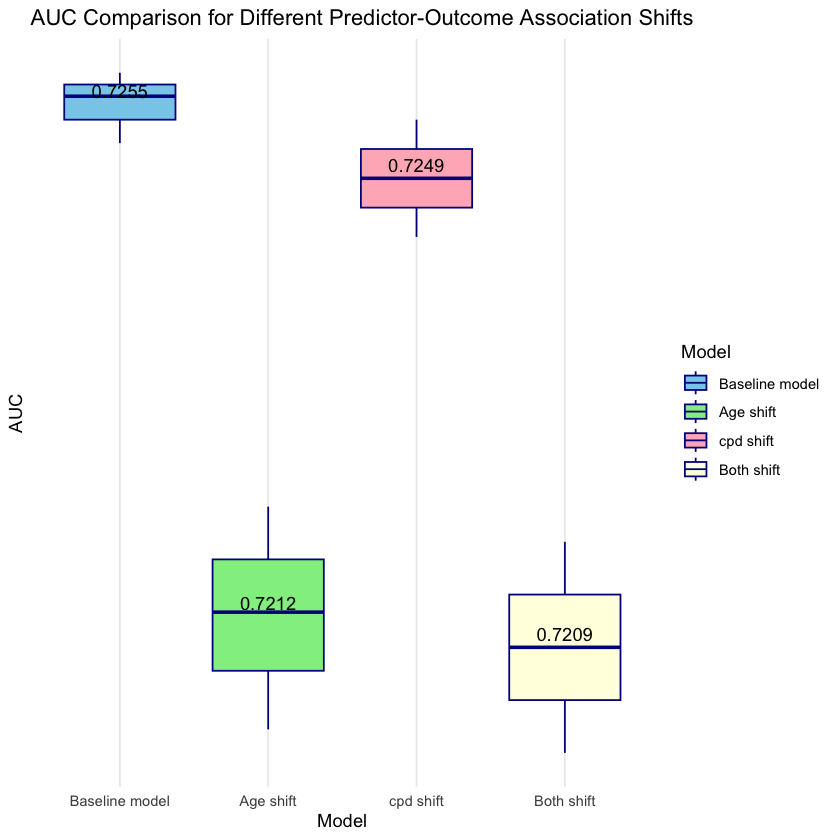

In [3]:
# 数据准备
data <- data.frame(
  Model = factor(c(rep("Baseline model", 3),
                   rep("Age shift", 3),
                   rep("cpd shift", 3),
                   rep("Both shift", 3)),
                 levels = c("Baseline model", "Age shift", "cpd shift", "Both shift")),  # 指定因子的水平顺序
  AUC = c(0.7256, 0.7252, 0.7258,
          0.7212, 0.7202, 0.7221,
          0.7249, 0.7244, 0.7254,
          0.7209, 0.7200,  0.7218)
)

# 绘制箱线图
ggplot(data, aes(x = Model, y = AUC, fill = Model)) +  # 通过fill参数指定颜色
  geom_boxplot(color = "darkblue") +
  labs(title = "AUC Comparison for Different Predictor-Outcome Association Shifts",
       x = "Model",
       y = "AUC") +
  theme_minimal() +
  scale_y_continuous(breaks = seq(0.703, 0.712, 0.001)) +  # 增加纵坐标的刻度线
  geom_text(stat = "summary", fun.y = median, aes(label = round(..y.., 4)), vjust = -0.5) +  # 添加中位数标签
  scale_fill_manual(values = c("Baseline model" = "skyblue", "Age shift" = "lightgreen", "cpd shift" = "lightpink", "Both shift" = "lightyellow"))  # 指定每个箱线图的颜色


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


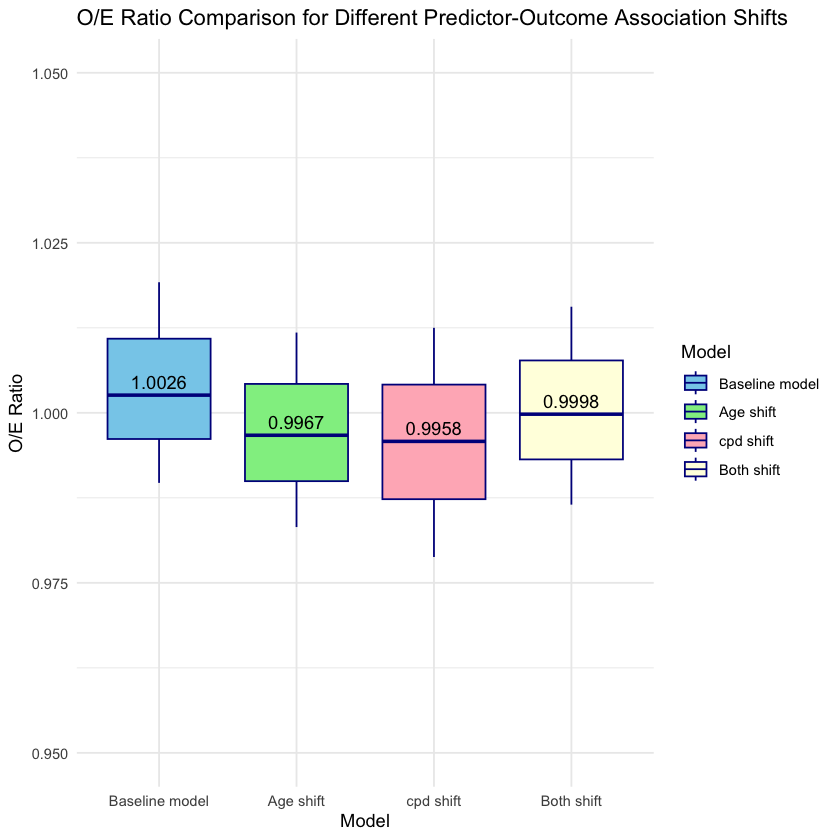

In [21]:

# 数据准备
data <- data.frame(
  Model = factor(c(rep("Baseline model", 3),
                   rep("Age shift", 3),
                   rep("cpd shift", 3),
                   rep("Both shift", 3)),
                 levels = c("Baseline model", "Age shift", "cpd shift", "Both shift")),  # 指定因子的水平顺序
  OE = c(1.0026, 0.9897, 1.0192,
         0.9967, 0.9832, 1.0118,
         0.9958, 0.9788, 1.0125,
         0.9998, 0.9865, 1.0156)
)

# 绘制箱线图
ggplot(data, aes(x = Model, y = OE, fill = Model)) +  # 通过fill参数指定颜色
  geom_boxplot(color = "darkblue") +
  labs(title = "O/E Ratio Comparison for Different Predictor-Outcome Association Shifts",
       x = "Model",
       y = "O/E Ratio") +
  theme_minimal() +
  scale_y_continuous(breaks = seq(0.975, 1.02, 0.005)) +  # 设置Y轴刻度
  geom_text(stat = "summary", fun = median, aes(label = round(..y.., 4)), vjust = -0.5) +  # 添加中位数标签
  scale_fill_manual(values = c("Baseline model" = "skyblue", "Age shift" = "lightgreen", "cpd shift" = "lightpink", "Both shift" = "lightyellow"))+   # 指定每个箱线图的颜色
  ylim(0.95, 1.05)  # 设置Y轴的范围

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


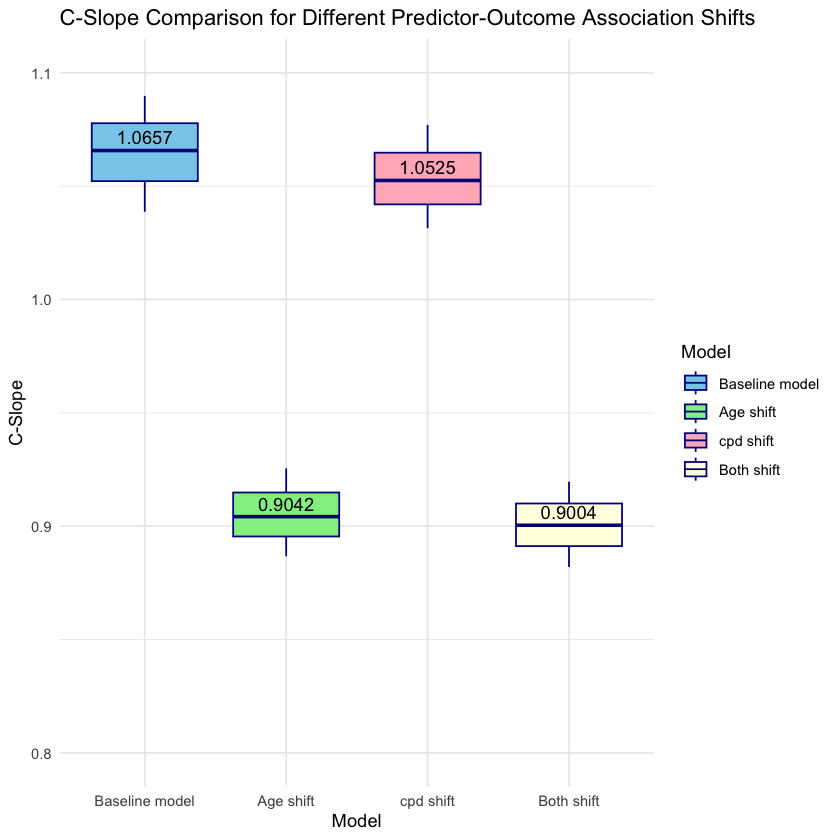

In [5]:

# 数据准备
data <- data.frame(
  Model = factor(c(rep("Baseline model", 3),
                   rep("Age shift", 3),
                   rep("cpd shift", 3),
                   rep("Both shift", 3)),
                 levels = c("Baseline model", "Age shift", "cpd shift", "Both shift")),  # 指定因子的水平顺序
  c_slope = c(1.0657, 1.0387, 1.0898,
              0.9042, 0.8867, 0.9255,
              1.0525, 1.0314, 1.0770,
              0.9004, 0.8820, 0.9196)
)

# 绘制箱线图
ggplot(data, aes(x = Model, y = c_slope, fill = Model)) +  # 通过fill参数指定颜色
  geom_boxplot(color = "darkblue") +
  labs(title = "C-Slope Comparison for Different Predictor-Outcome Association Shifts",
       x = "Model",
       y = "C-Slope") +
  theme_minimal() +
  scale_y_continuous(breaks = seq(0.8, 1.1, 0.05)) +  # 设置Y轴刻度
  geom_text(stat = "summary", fun = median, aes(label = round(..y.., 4)), vjust = -0.5) +  # 添加中位数标签
  scale_fill_manual(values = c("Baseline model" = "skyblue", "Age shift" = "lightgreen", "cpd shift" = "lightpink", "Both shift" = "lightyellow")) +  # 指定每个箱线图的颜色
  ylim(0.8, 1.1)  # 设置Y轴的范围


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


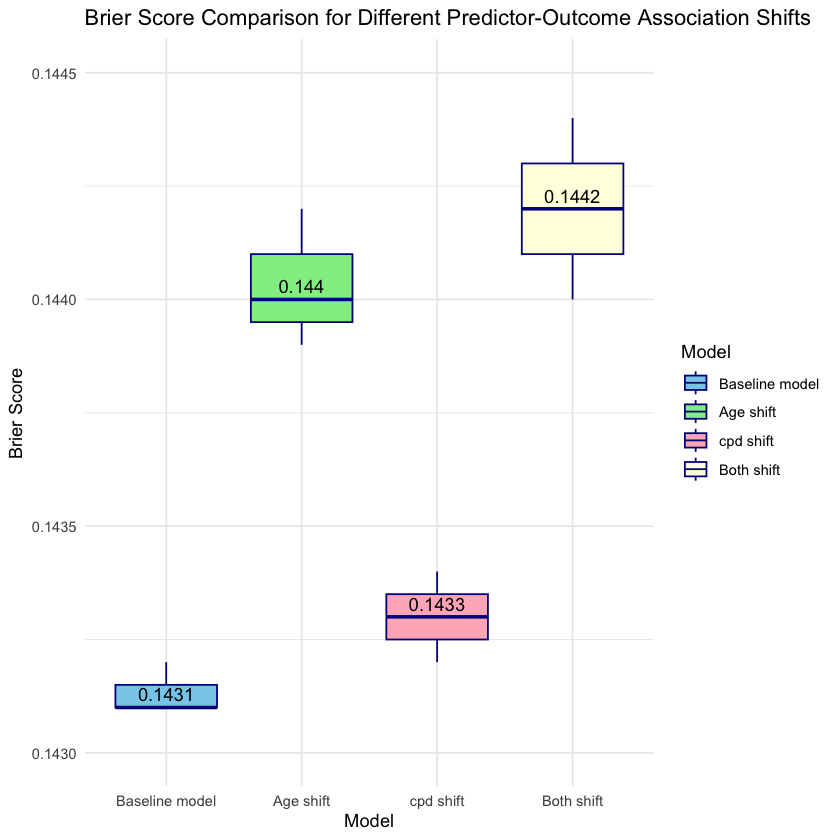

In [15]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(purrr)

# 数据准备
data <- data.frame(
  Model = factor(c(rep("Baseline model", 3),
                   rep("Age shift", 3),
                   rep("cpd shift", 3),
                   rep("Both shift", 3)),
                 levels = c("Baseline model", "Age shift", "cpd shift", "Both shift")),  # 指定因子的水平顺序
  brier_score = c(0.1431, 0.1431, 0.1432,
                  0.1440, 0.1439, 0.1442,
                  0.1433, 0.1432, 0.1434,
                  0.1442, 0.1440, 0.1444)
)

# 绘制箱线图
ggplot(data, aes(x = Model, y = brier_score, fill = Model)) +  # 通过fill参数指定颜色
  geom_boxplot(color = "darkblue") +
  labs(title = "Brier Score Comparison for Different Predictor-Outcome Association Shifts",
       x = "Model",
       y = "Brier Score") +
  theme_minimal() +
  scale_y_continuous(breaks = seq(0.146, 0.148, 0.0005)) +  # 设置Y轴刻度
  geom_text(stat = "summary", fun = median, aes(label = round(..y.., 4)), vjust = -0.5) +  # 添加中位数标签
  scale_fill_manual(values = c("Baseline model" = "skyblue", "Age shift" = "lightgreen", "cpd shift" = "lightpink", "Both shift" = "lightyellow")) +  # 指定每个箱线图的颜色
  ylim(0.143, 0.1445)  # 设置Y轴的范围


2） event rate shift

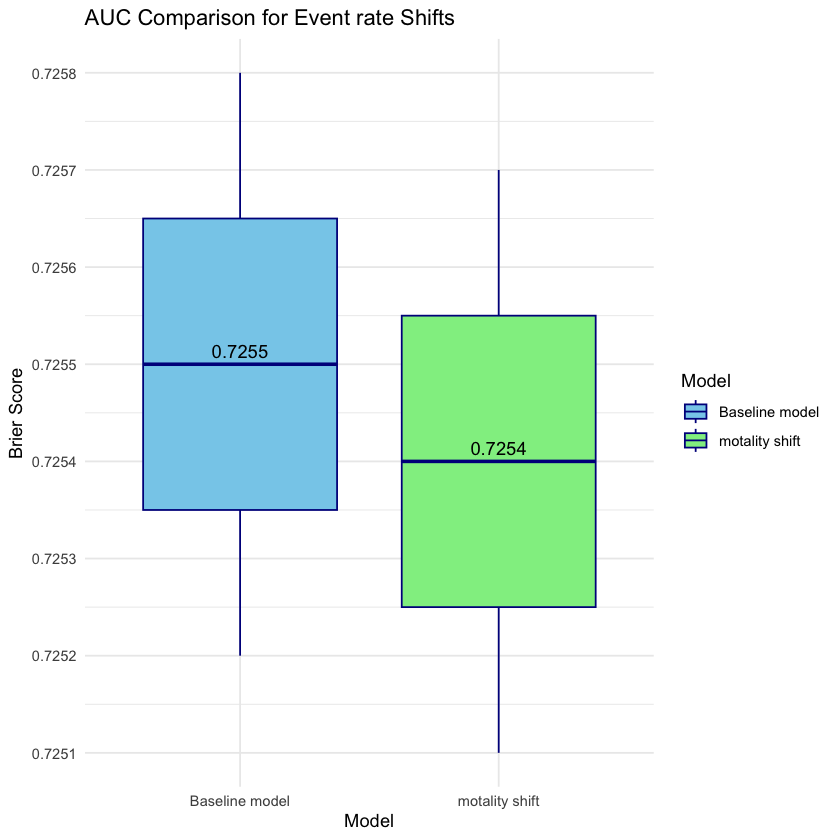

In [29]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(purrr)

# 数据准备
data <- data.frame(
  Model = factor(c(rep("Baseline model", 3),
                   rep("motality shift", 3)),
                levels = c("Baseline model", "motality shift")),  # 指定因子的水平顺序
  brier_score = c(0.7255, 0.7252, 0.7258,
                  0.7254,0.7251, 0.7257)
)

# 绘制箱线图
ggplot(data, aes(x = Model, y = brier_score, fill = Model)) +  # 通过fill参数指定颜色
  geom_boxplot(color = "darkblue") +
  labs(title = "AUC Comparison for Event rate Shifts",
       x = "Model",
       y = "Brier Score") +
  theme_minimal() +
  scale_y_continuous(breaks = seq(0.72, 0.73, 0.0001)) +  # 设置Y轴刻度
  geom_text(stat = "summary", fun = median, aes(label = round(..y.., 4)), vjust = -0.5) +  # 添加中位数标签
  scale_fill_manual(values = c("Baseline model" = "skyblue", "motality shift" = "lightgreen"))   # 指定每个箱线图的颜色



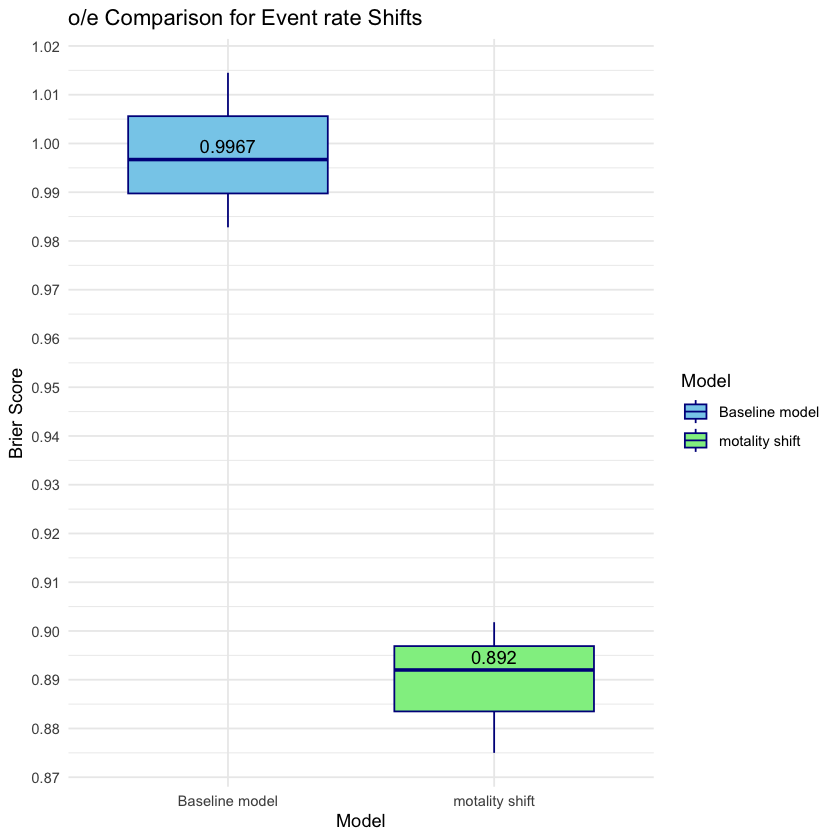

In [34]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(purrr)

# 数据准备
data <- data.frame(
  Model = factor(c(rep("Baseline model", 3),
                   rep("motality shift", 3)),
                levels = c("Baseline model", "motality shift")),  # 指定因子的水平顺序
  brier_score = c(0.9967, 0.9828, 1.0145,
                  0.8920, 0.8750, 0.9018)
)

# 绘制箱线图
ggplot(data, aes(x = Model, y = brier_score, fill = Model)) +  # 通过fill参数指定颜色
  geom_boxplot(color = "darkblue") +
  labs(title = "o/e Comparison for Event rate Shifts",
       x = "Model",
       y = "Brier Score") +
  theme_minimal() +
  scale_y_continuous(breaks = seq(0.85, 1.1, 0.01)) +  # 设置Y轴刻度
  geom_text(stat = "summary", fun = median, aes(label = round(..y.., 4)), vjust = -0.5) +  # 添加中位数标签
  scale_fill_manual(values = c("Baseline model" = "skyblue", "motality shift" = "lightgreen"))   # 指定每个箱线图的颜色



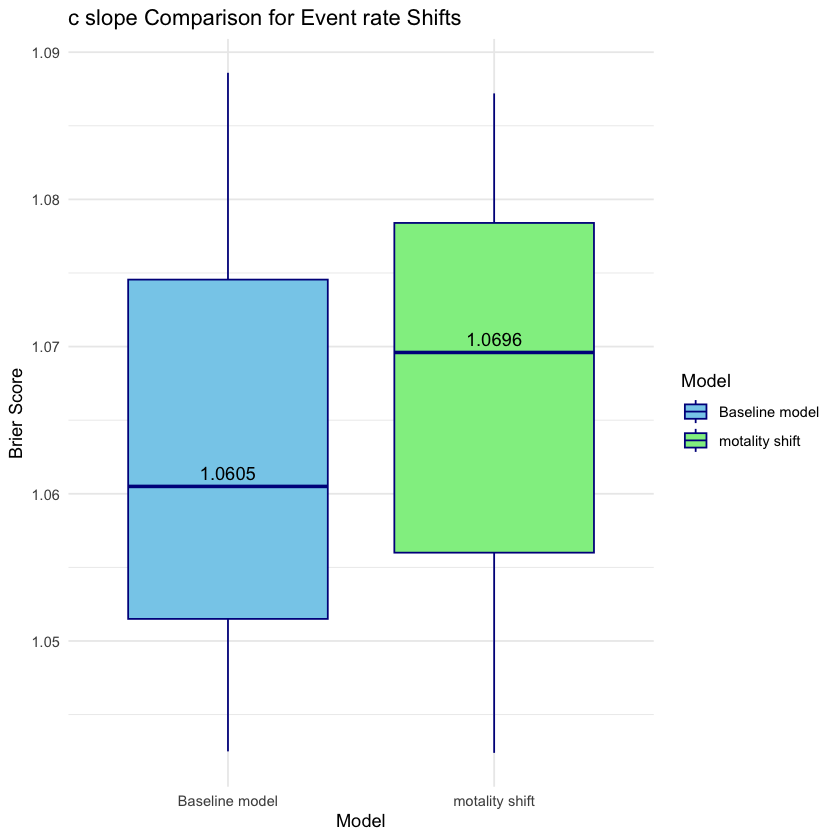

In [35]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(purrr)

# 数据准备
data <- data.frame(
  Model = factor(c(rep("Baseline model", 3),
                   rep("motality shift", 3)),
                levels = c("Baseline model", "motality shift")),  # 指定因子的水平顺序
  brier_score = c(1.0605, 1.0425, 1.0886,
                  1.0696, 1.0424, 1.0872)
)

# 绘制箱线图
ggplot(data, aes(x = Model, y = brier_score, fill = Model)) +  # 通过fill参数指定颜色
  geom_boxplot(color = "darkblue") +
  labs(title = "c slope Comparison for Event rate Shifts",
       x = "Model",
       y = "Brier Score") +
  theme_minimal() +
  scale_y_continuous(breaks = seq(0.85, 1.1, 0.01)) +  # 设置Y轴刻度
  geom_text(stat = "summary", fun = median, aes(label = round(..y.., 4)), vjust = -0.5) +  # 添加中位数标签
  scale_fill_manual(values = c("Baseline model" = "skyblue", "motality shift" = "lightgreen"))   # 指定每个箱线图的颜色



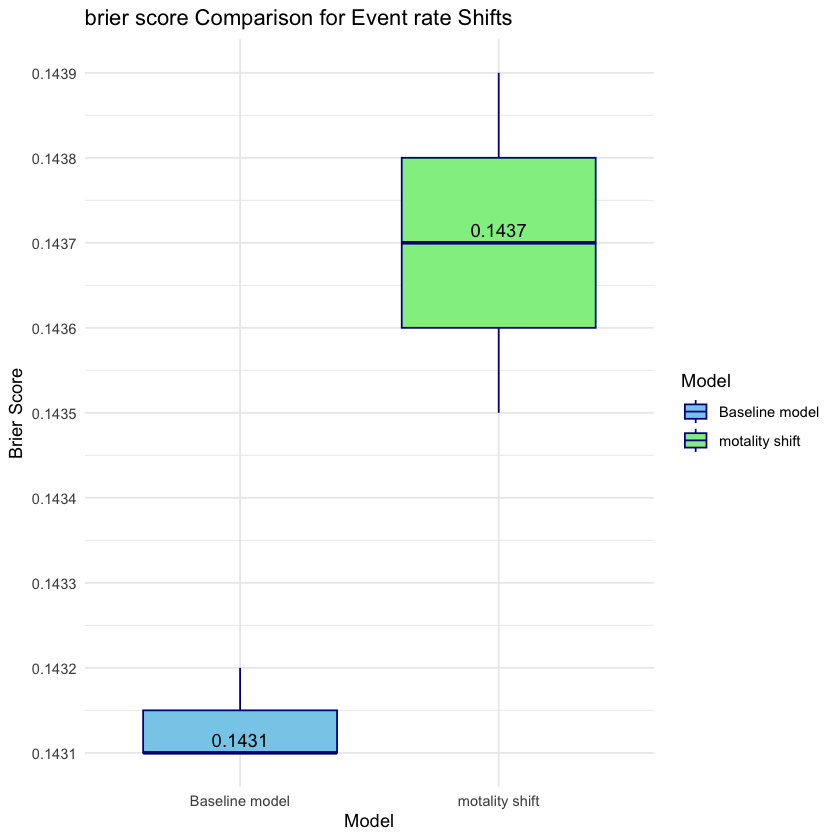

In [39]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(purrr)

# 数据准备
data <- data.frame(
  Model = factor(c(rep("Baseline model", 3),
                   rep("motality shift", 3)),
                levels = c("Baseline model", "motality shift")),  # 指定因子的水平顺序
  brier_score = c(0.1431, 0.1431, 0.1432,
                  0.1437, 0.1435, 0.1439)
)

# 绘制箱线图
ggplot(data, aes(x = Model, y = brier_score, fill = Model)) +  # 通过fill参数指定颜色
  geom_boxplot(color = "darkblue") +
  labs(title = "brier score Comparison for Event rate Shifts",
       x = "Model",
       y = "Brier Score") +
  theme_minimal() +
  scale_y_continuous(breaks = seq(0.13, 0.15, 0.0001)) +  # 设置Y轴刻度
  geom_text(stat = "summary", fun = median, aes(label = round(..y.., 4)), vjust = -0.5) +  # 添加中位数标签
  scale_fill_manual(values = c("Baseline model" = "skyblue", "motality shift" = "lightgreen"))   # 指定每个箱线图的颜色



2) case mix shift

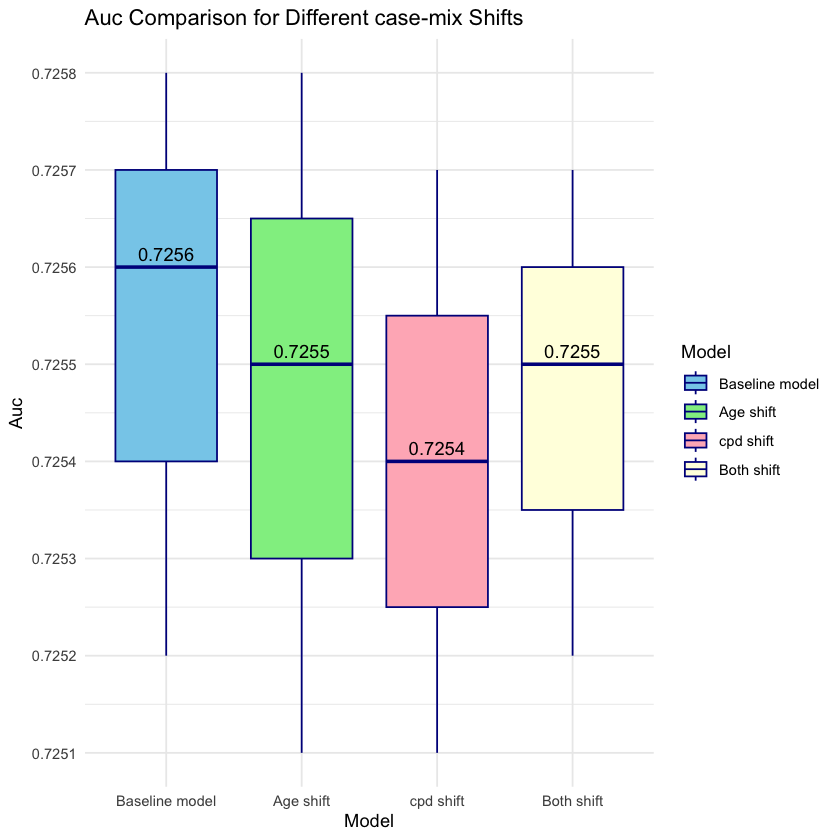

In [4]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(purrr)

# 数据准备
data <- data.frame(
  Model = factor(c(rep("Baseline model", 3),
                   rep("Age shift", 3),
                   rep("cpd shift", 3),
                   rep("Both shift", 3)),
                 levels = c("Baseline model", "Age shift", "cpd shift", "Both shift")),  # 指定因子的水平顺序
  auc = c(0.7256, 0.7252, 0.7258,
          0.7255, 0.7251, 0.7258,
          0.7254, 0.7251, 0.7257,
          0.7255, 0.7252, 0.7257)
)

# 绘制箱线图
ggplot(data, aes(x = Model, y = auc, fill = Model)) +  # 通过fill参数指定颜色
  geom_boxplot(color = "darkblue") +
  labs(title = "Auc Comparison for Different case-mix Shifts",
       x = "Model",
       y = "Auc") +
  theme_minimal() +
  scale_y_continuous(breaks = seq(0.60, 0.85, 0.0001)) +  # 设置Y轴刻度
  geom_text(stat = "summary", fun = median, aes(label = round(..y.., 4)), vjust = -0.5) +  # 添加中位数标签
  scale_fill_manual(values = c("Baseline model" = "skyblue", "Age shift" = "lightgreen", "cpd shift" = "lightpink", "Both shift" = "lightyellow"))   # 指定每个箱线图的颜色



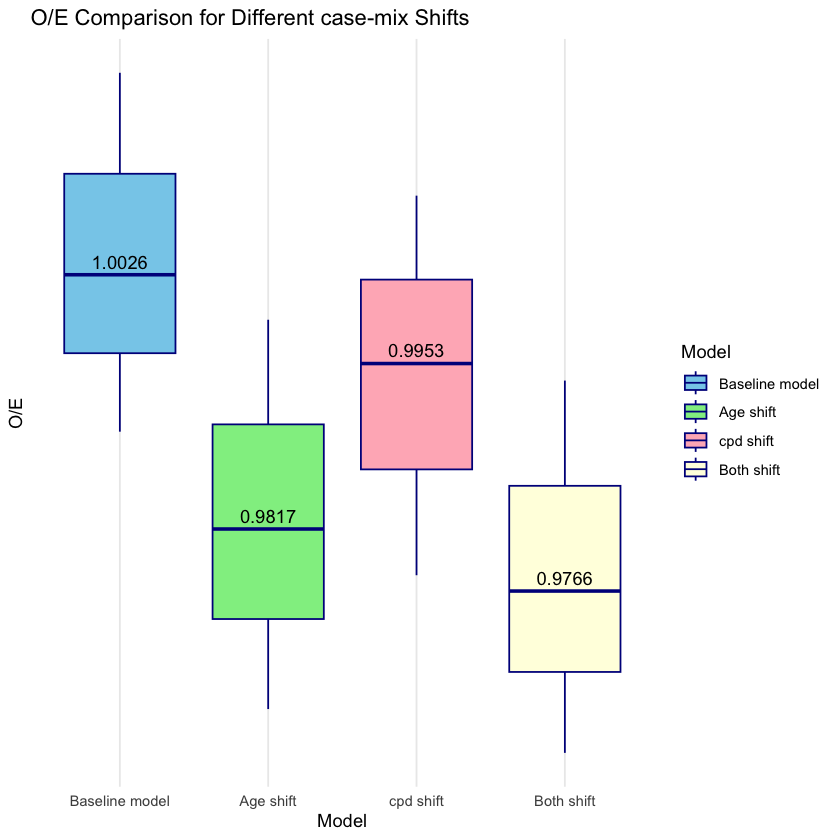

In [6]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(purrr)

# 数据准备
data <- data.frame(
  Model = factor(c(rep("Baseline model", 3),
                   rep("Age shift", 3),
                   rep("cpd shift", 3),
                   rep("Both shift", 3)),
                 levels = c("Baseline model", "Age shift", "cpd shift", "Both shift")),  # 指定因子的水平顺序
  o_e = c(1.0026, 0.9897, 1.0192,
          0.9817, 0.9669, 0.9989,
          0.9953, 0.9779, 1.0091,
          0.9766, 0.9633, 0.9939)
)

# 绘制箱线图
ggplot(data, aes(x = Model, y = o_e, fill = Model)) +  # 通过fill参数指定颜色
  geom_boxplot(color = "darkblue") +
  labs(title = "O/E Comparison for Different case-mix Shifts",
       x = "Model",
       y = "O/E") +
  theme_minimal() +
  scale_y_continuous(breaks = seq(0.60, 0.85, 0.0001)) +  # 设置Y轴刻度
  geom_text(stat = "summary", fun = median, aes(label = round(..y.., 4)), vjust = -0.5) +  # 添加中位数标签
  scale_fill_manual(values = c("Baseline model" = "skyblue", "Age shift" = "lightgreen", "cpd shift" = "lightpink", "Both shift" = "lightyellow"))   # 指定每个箱线图的颜色



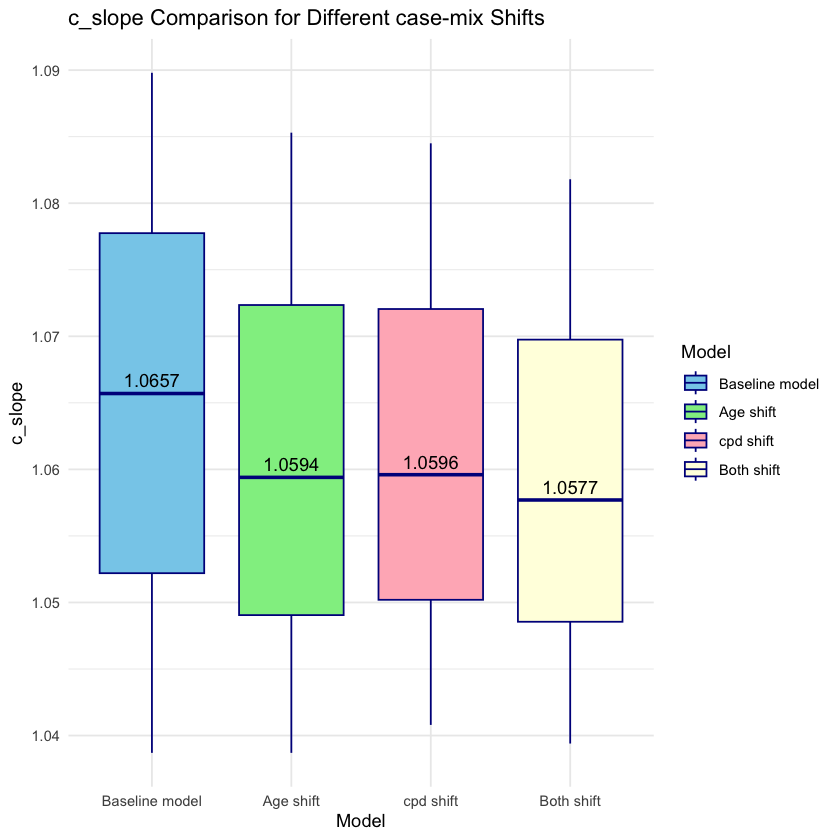

In [8]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(purrr)

# 数据准备
data <- data.frame(
  Model = factor(c(rep("Baseline model", 3),
                   rep("Age shift", 3),
                   rep("cpd shift", 3),
                   rep("Both shift", 3)),
                 levels = c("Baseline model", "Age shift", "cpd shift", "Both shift")),  # 指定因子的水平顺序
  c_slope = c(1.0657, 1.0387, 1.0898,
          1.0594, 1.0387, 1.0853,
          1.0596, 1.0408, 1.0845,
          1.0577, 1.0394, 1.0818)
)

# 绘制箱线图
ggplot(data, aes(x = Model, y = c_slope, fill = Model)) +  # 通过fill参数指定颜色
  geom_boxplot(color = "darkblue") +
  labs(title = "c_slope Comparison for Different case-mix Shifts",
       x = "Model",
       y = "c_slope") +
  theme_minimal() +
  scale_y_continuous(breaks = seq(1.0, 1.1, 0.01)) +  # 设置Y轴刻度
  geom_text(stat = "summary", fun = median, aes(label = round(..y.., 4)), vjust = -0.5) +  # 添加中位数标签
  scale_fill_manual(values = c("Baseline model" = "skyblue", "Age shift" = "lightgreen", "cpd shift" = "lightpink", "Both shift" = "lightyellow"))   # 指定每个箱线图的颜色



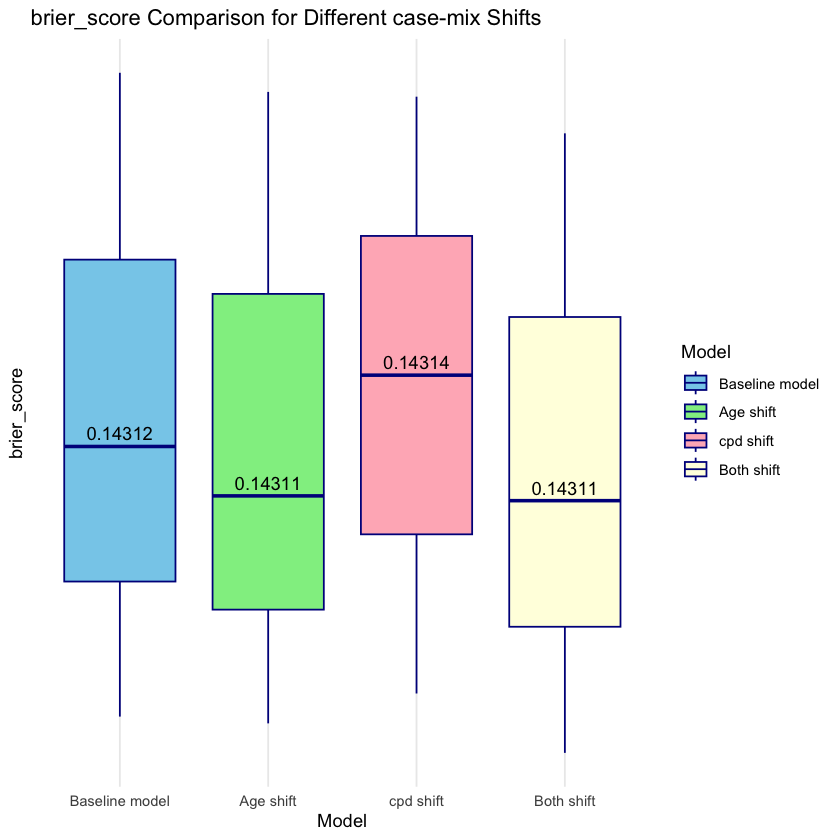

In [11]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(purrr)

# 数据准备
data <- data.frame(
  Model = factor(c(rep("Baseline model", 3),
                   rep("Age shift", 3),
                   rep("cpd shift", 3),
                   rep("Both shift", 3)),
                 levels = c("Baseline model", "Age shift", "cpd shift", "Both shift")),  # 指定因子的水平顺序
  brier_score = c(0.1431202, 0.1430524, 0.1432140,
          0.1431078, 0.1430507, 0.1432092,
          0.1431381, 0.1430582, 0.1432080, 
          0.1431066, 0.1430433, 0.1431988)
)

# 绘制箱线图
ggplot(data, aes(x = Model, y = brier_score, fill = Model)) +  # 通过fill参数指定颜色
  geom_boxplot(color = "darkblue") +
  labs(title = "brier_score Comparison for Different case-mix Shifts",
       x = "Model",
       y = "brier_score") +
  theme_minimal() +
  scale_y_continuous(breaks = seq(1.0, 1.1, 0.01)) +  # 设置Y轴刻度
  geom_text(stat = "summary", fun = median, aes(label = round(..y.., 5)), vjust = -0.5) +  # 添加中位数标签
  scale_fill_manual(values = c("Baseline model" = "skyblue", "Age shift" = "lightgreen", "cpd shift" = "lightpink", "Both shift" = "lightyellow"))   # 指定每个箱线图的颜色



# 2）Testing Multiple Parameters Beta Change

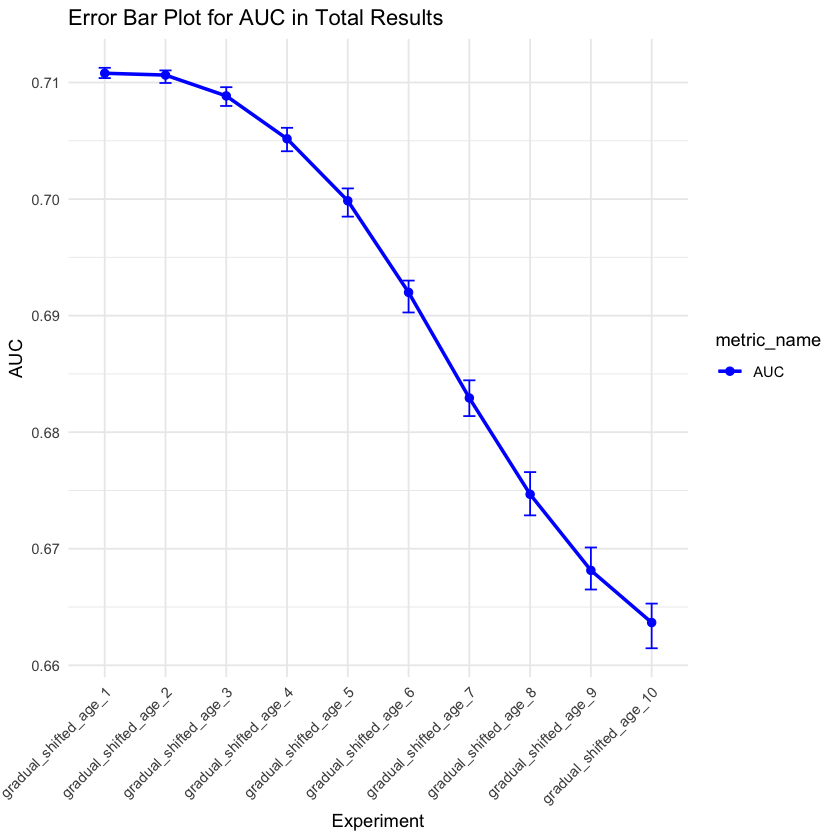

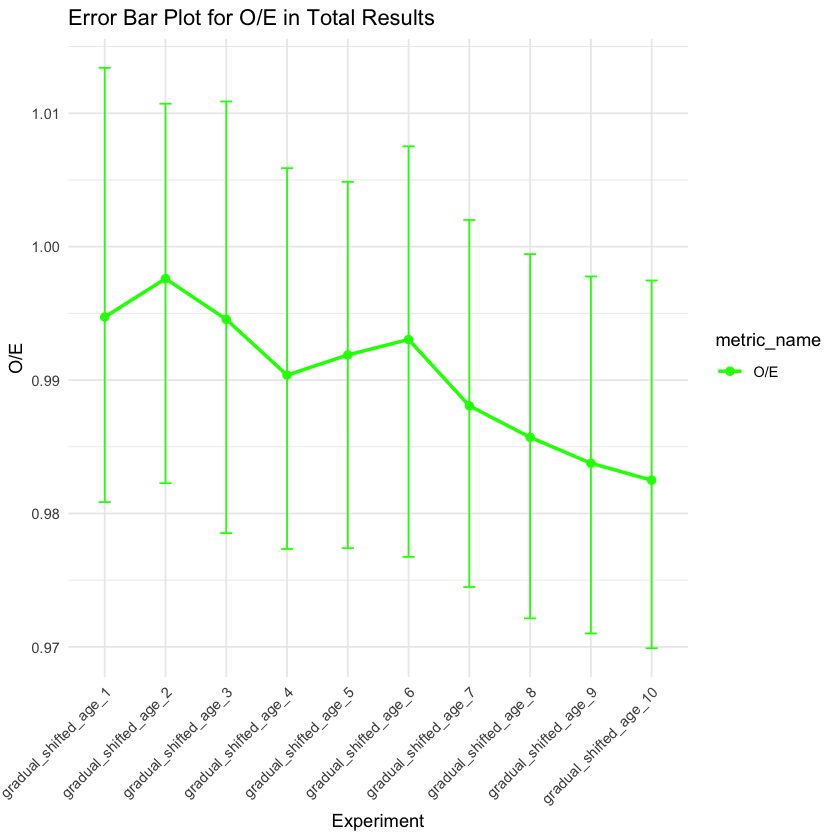

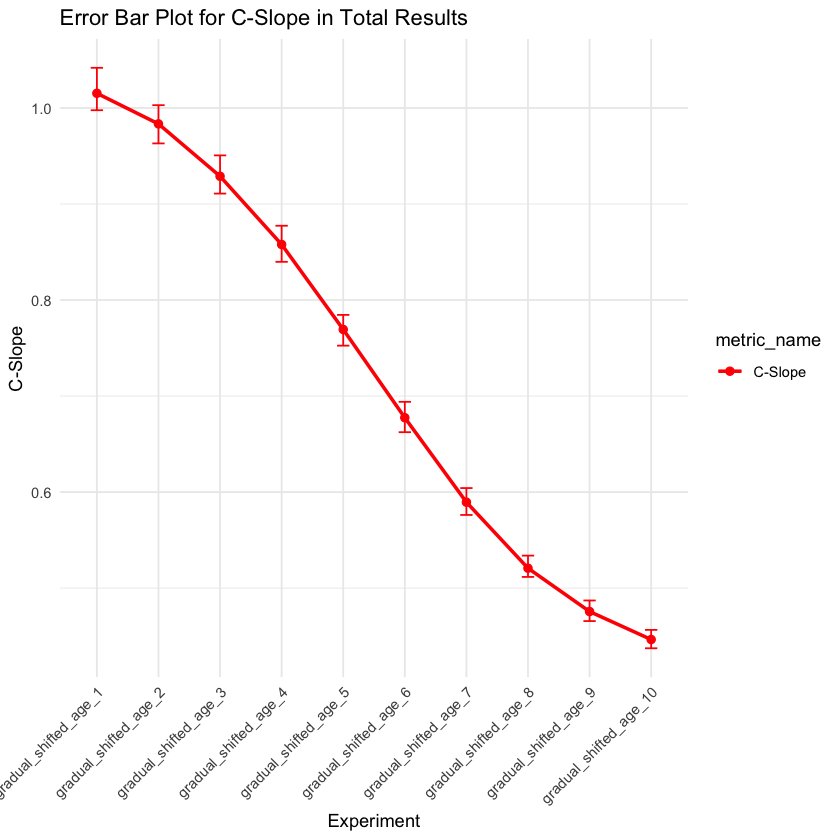

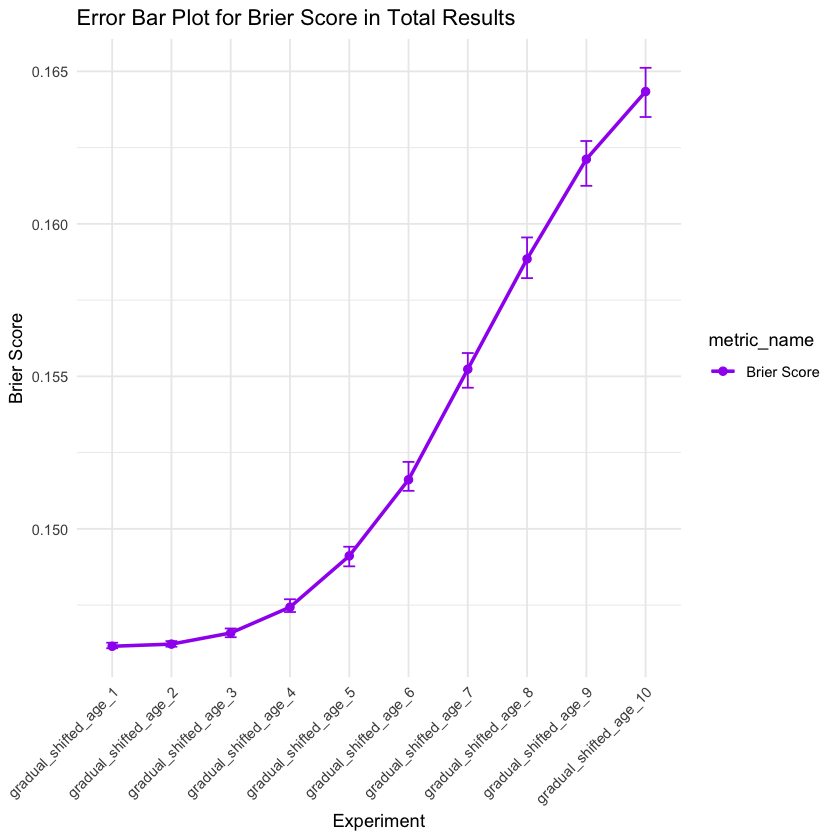

In [26]:
# 安装并加载所需包
if (!requireNamespace("purrr", quietly = TRUE)) install.packages("purrr")
library(ggplot2)
library(dplyr)
library(tidyr)
library(purrr)  # 确保加载purrr包

# 模拟生成结果数据（你应该使用实际的 results_shifted_age_2）
results_shifted_age_2 <- data.frame(
  experiment = c("gradual_shifted_age_1", "gradual_shifted_age_2", "gradual_shifted_age_3",
                 "gradual_shifted_age_4", "gradual_shifted_age_5", "gradual_shifted_age_6",
                 "gradual_shifted_age_7", "gradual_shifted_age_8", "gradual_shifted_age_9",
                 "gradual_shifted_age_10"),
  auc = c("0.7107952 (0.7103789, 0.7112620)", "0.7106393 (0.7099591, 0.7110380)", "0.7088502 (0.7079886, 0.7095997)",
          "0.7051725 (0.7041031, 0.7061142)", "0.6998514 (0.6984942, 0.7009151)", "0.6919955 (0.6902714, 0.6930065)",
          "0.6829338 (0.6813818, 0.6844511)", "0.6746717 (0.6728639, 0.6765765)", "0.6681469 (0.6665038, 0.6701091)",
          "0.6636682 (0.6614625, 0.6652953)"),
  o_e = c("0.9947271 (0.9808540, 1.0134070)", "0.9976030 (0.9822711, 1.0107157)", "0.9945493 (0.9785285, 1.0108813)",
          "0.9903708 (0.9773391, 1.0058839)", "0.9918848 (0.9773999, 1.0048580)", "0.9930417 (0.9767467, 1.0075273)",
          "0.9880708 (0.9744861, 1.0020000)", "0.9857101 (0.9721393, 0.9994444)", "0.9837670 (0.9710033, 0.9977695)",
          "0.9824932 (0.9698970, 0.9974642)"),
  c_slope = c("1.0152971 (0.9976639, 1.0418279)", "0.9834149 (0.9630850, 1.0029171)", "0.9288872 (0.9108573, 0.9506096)",
              "0.8578280 (0.8397703, 0.8773538)", "0.7693236 (0.7524867, 0.7845187)", "0.6774355 (0.6623631, 0.6939786)",
              "0.5894787 (0.5761711, 0.6041667)", "0.5207167 (0.5116369, 0.5338240)", "0.4756013 (0.4656483, 0.4871079)",
              "0.4464311 (0.4373411, 0.4564711)"),
  brier_score = c("0.1461497 (0.1460842, 0.1462659)", "0.1462201 (0.1461356, 0.1463193)", "0.1465859 (0.1464455, 0.1467331)",
                  "0.1474322 (0.1472720, 0.1476909)", "0.1491128 (0.1487701, 0.1494136)", "0.1516111 (0.1512466, 0.1521957)",
                  "0.1552343 (0.1546273, 0.1557648)", "0.1588495 (0.1582202, 0.1595548)", "0.1621204 (0.1612475, 0.1627165)",
                  "0.1643386 (0.1635035, 0.1651169)")
)

# 分离数据并创建中位数、25%和75%的列
split_values <- function(value) {
  value <- gsub("[()]", "", value)
  parts <- strsplit(value, " ")[[1]]
  return(c(as.numeric(parts[1]), as.numeric(sub(",", "", parts[2])), as.numeric(parts[3])))
}

results_split <- results_shifted_age_2 %>%
  rowwise() %>%
  mutate(auc_split = list(split_values(auc)),
         o_e_split = list(split_values(o_e)),
         c_slope_split = list(split_values(c_slope)),
         brier_score_split = list(split_values(brier_score))) %>%
  unnest_wider(auc_split, names_sep = "_") %>%
  unnest_wider(o_e_split, names_sep = "_") %>%
  unnest_wider(c_slope_split, names_sep = "_") %>%
  unnest_wider(brier_score_split, names_sep = "_") %>%
  rename(auc_median = auc_split_1, auc_25 = auc_split_2, auc_75 = auc_split_3,
         o_e_median = o_e_split_1, o_e_25 = o_e_split_2, o_e_75 = o_e_split_3,
         c_slope_median = c_slope_split_1, c_slope_25 = c_slope_split_2, c_slope_75 = c_slope_split_3,
         brier_score_median = brier_score_split_1, brier_score_25 = brier_score_split_2, brier_score_75 = brier_score_split_3)

create_error_bar_plots <- function(data_frame, data_frame_name) {
  # 动态获取 experiment 列的唯一值，并按正确顺序排列
  unique_experiments <- unique(data_frame$experiment)
  
  # 确保 experiment 列作为因子并按唯一值排序
  data_frame$experiment <- factor(data_frame$experiment, levels = unique_experiments)
  
  # 创建误差条图和折线图的函数
  create_error_bar_plot <- function(metric_median, metric_25, metric_75, metric_name, metric_color) {
    ggplot(data_frame, aes(x = experiment, y = !!sym(metric_median))) +
      geom_line(aes(group = 1, color = metric_name), size = 1) +
      geom_point(aes(color = metric_name), size = 2) +
      geom_errorbar(aes(ymin = !!sym(metric_25), ymax = !!sym(metric_75), color = metric_name), width = 0.2) +
      scale_color_manual(values = metric_color) +
      theme_minimal() +
      labs(title = paste("Error Bar Plot for", metric_name, "in", data_frame_name),
           x = "Experiment", y = metric_name) +
      theme(axis.text.x = element_text(angle = 45, hjust = 1))
  }

  # 创建各个性能指标的图表
  plot_auc <- create_error_bar_plot("auc_median", "auc_25", "auc_75", "AUC", "blue")
  plot_oe <- create_error_bar_plot("o_e_median", "o_e_25", "o_e_75", "O/E", "green")
  plot_cslope <- create_error_bar_plot("c_slope_median", "c_slope_25", "c_slope_75", "C-Slope", "red")
  plot_brier_score <- create_error_bar_plot("brier_score_median", "brier_score_25", "brier_score_75", "Brier Score", "purple")

  # 打印图表
  print(plot_auc)
  print(plot_oe)
  print(plot_cslope)
  print(plot_brier_score)
}

# 使用转换后的数据框创建图表
create_error_bar_plots(results_split, "Total Results")


Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0285' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0285' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0378' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0378' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0502' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0502' in 'mbcsToSbcs': dot su

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0884' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0884' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.1173' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.1173' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.1557' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.1557' in 'mbcsToSbcs': dot su

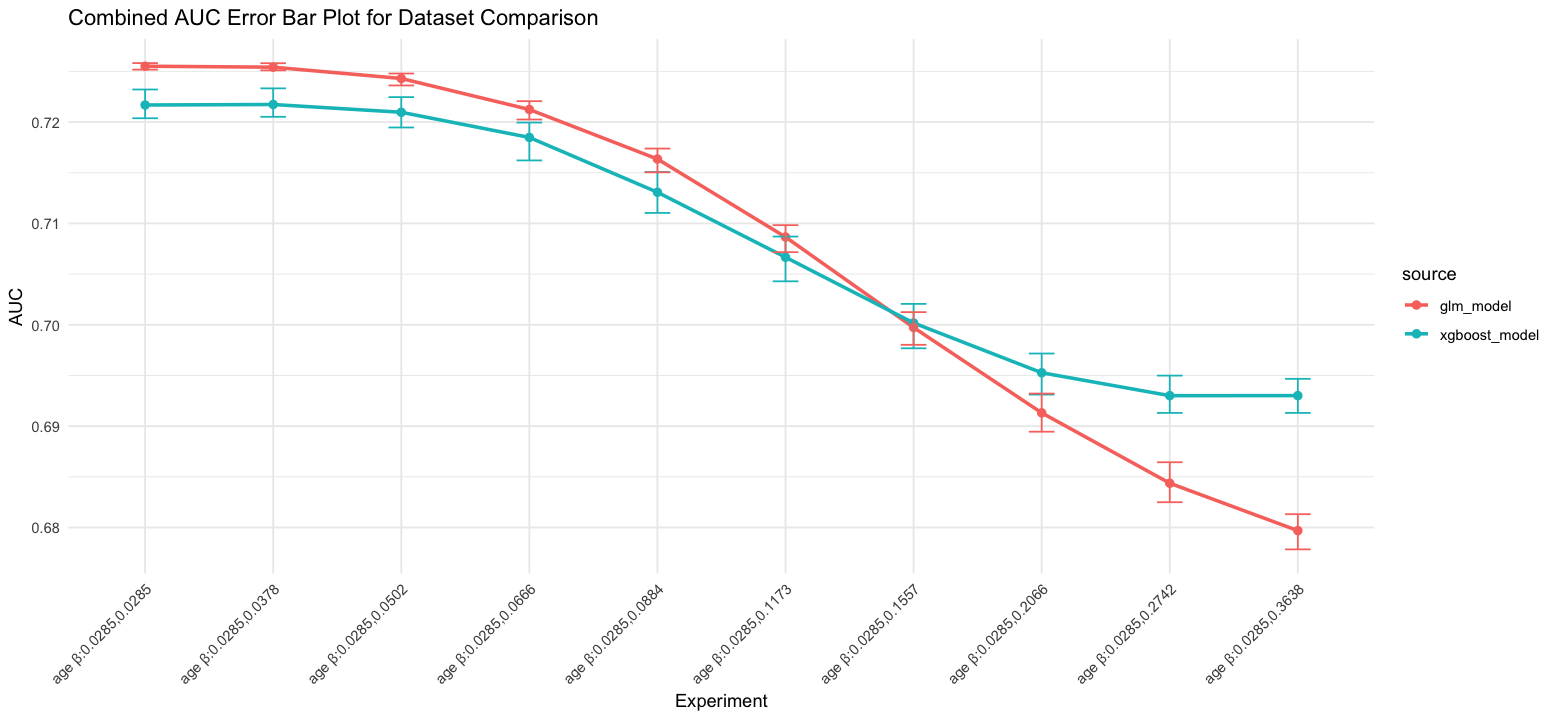

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0285' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0285' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0378' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0378' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0502' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0502' in 'mbcsToSbcs': dot su

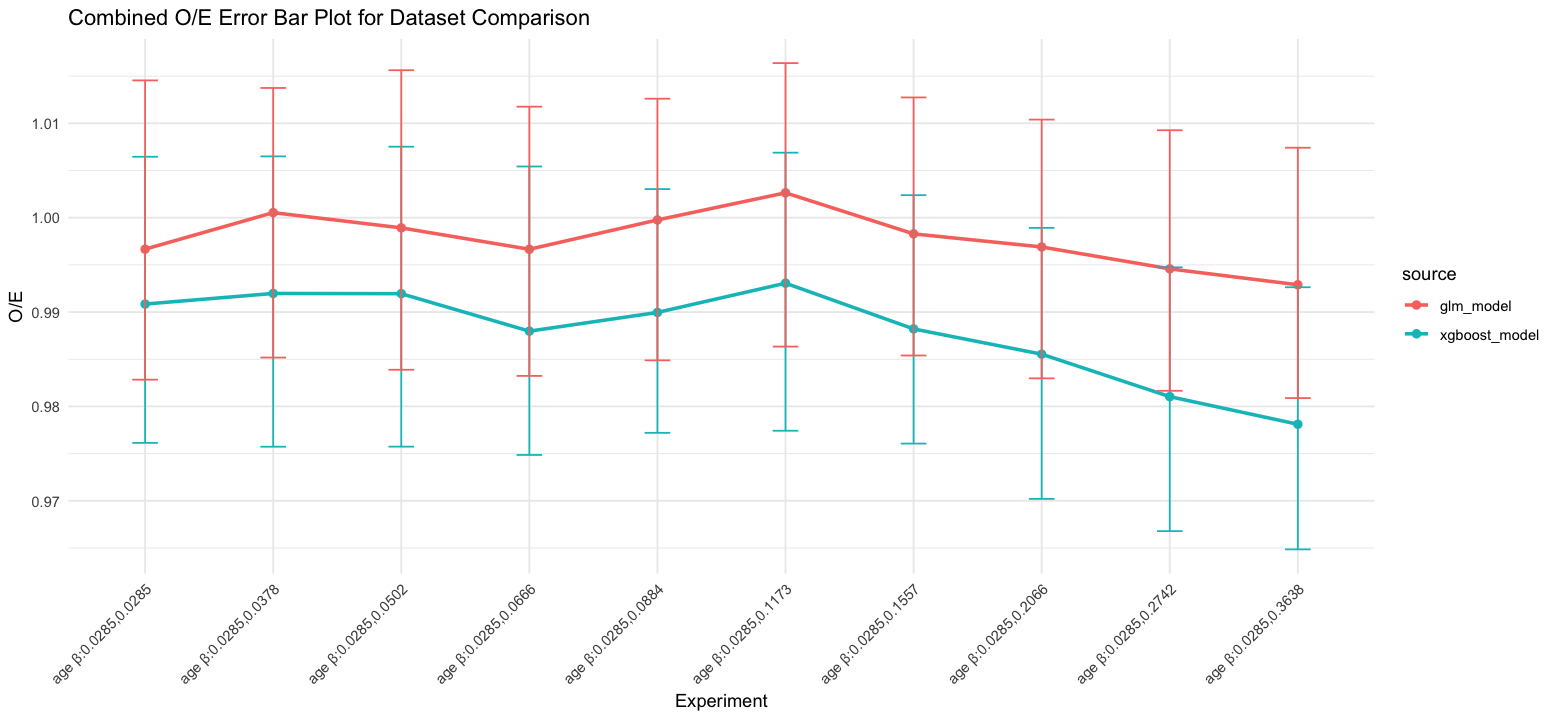

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0285' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0285' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0378' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0378' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0502' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0502' in 'mbcsToSbcs': dot su

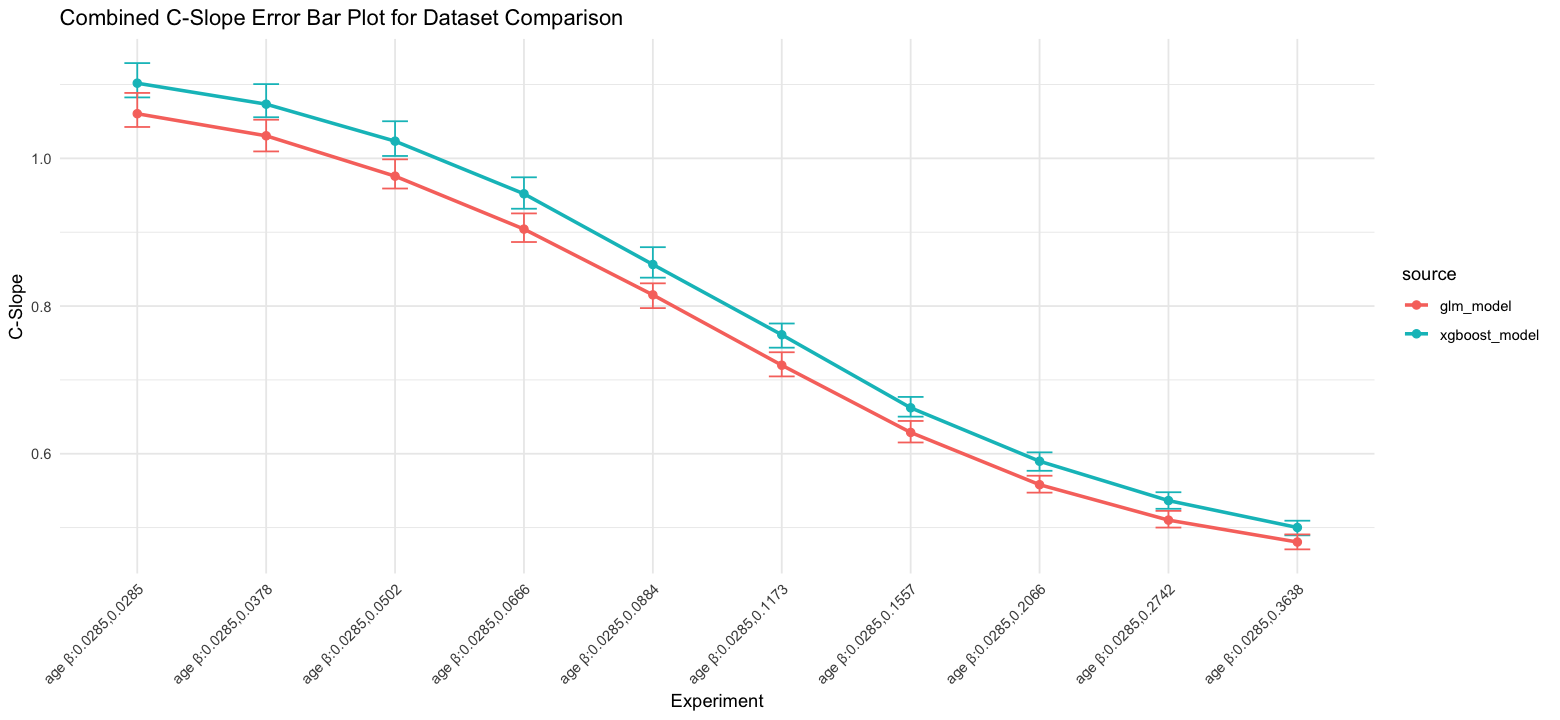

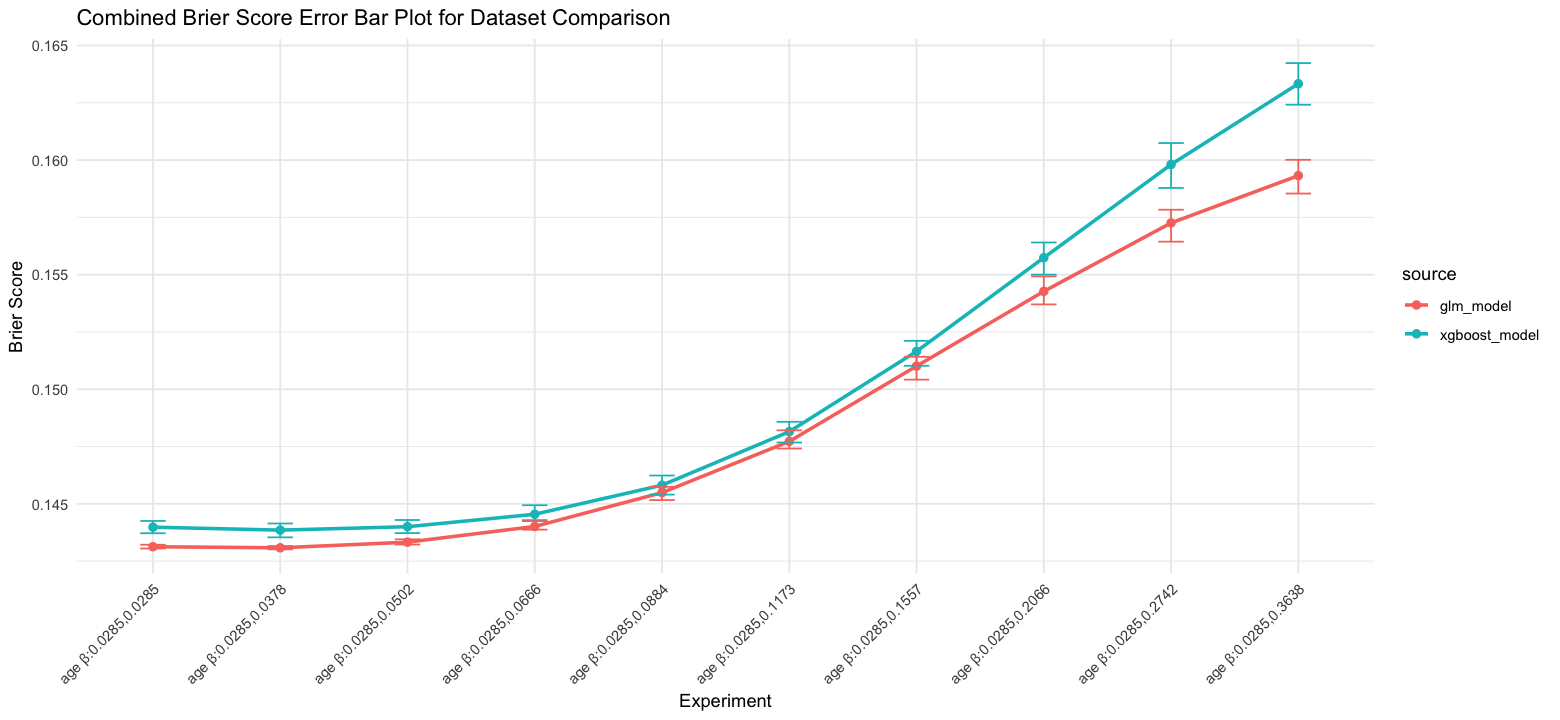

In [24]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(purrr) 

# 设置图像输出宽度
options(repr.plot.width = 13, repr.plot.height = 6)

# 定义第一个数据框
xgboost_model <- data.frame(
  experiment = c("age β:0.0285,0.0285", "age β:0.0285,0.0378", "age β:0.0285,0.0502", "age β:0.0285,0.0666", "age β:0.0285,0.0884", "age β:0.0285,0.1173", "age β:0.0285,0.1557", "age β:0.0285,0.2066", "age β:0.0285,0.2742", "age β:0.0285,0.3638"),
  auc_median = c(0.7216787, 0.7217283, 0.7209632, 0.7184789, 0.7130723, 0.7066622, 0.7001814, 0.6952700, 0.6930090, 0.6930118),
  auc_25 = c(0.7203728, 0.7205140, 0.7194616, 0.7162116, 0.7110333, 0.7042882, 0.6976794, 0.6931134, 0.6913084, 0.6913092),
  auc_75 = c(0.7232080, 0.7233200, 0.7224571, 0.7199478, 0.7150677, 0.7087043, 0.7020594, 0.6971644, 0.6949880, 0.6946674),
  o_e_median = c(0.9908482, 0.9919716, 0.9919474, 0.9879761, 0.9899602, 0.9930604, 0.9882135, 0.9855371, 0.9810371, 0.9781105),
  o_e_25 = c(0.9761388, 0.9757308, 0.9757385, 0.9748575, 0.9772003, 0.9774241, 0.9760639, 0.9702029, 0.9667845, 0.9648539),
  o_e_75 = c(1.0064552, 1.0064956, 1.0075228, 1.0054245, 1.0030273, 1.0068886, 1.0023846, 0.9989224, 0.9947392, 0.9926279),
  c_slope_median = c(1.1018101, 1.0734043, 1.0233041, 0.9520166, 0.8562793, 0.7611218, 0.6622198, 0.5898776, 0.5365788, 0.5001201),
  c_slope_25 = c(1.0825348, 1.0556859, 1.0032367, 0.9317914, 0.8384487, 0.7436390, 0.6502341, 0.5769145, 0.5254410, 0.4895249),
  c_slope_75 = c(1.1290088, 1.1005417, 1.0502581, 0.9743511, 0.8797209, 0.7763690, 0.6769503, 0.6018889, 0.5478753, 0.5093185),
  brier_score_median = c(0.1439825, 0.1438526, 0.1440021, 0.1445453, 0.1458138, 0.1481492, 0.1516529, 0.1557395, 0.1598077, 0.1633338),
  brier_score_25 = c(0.1437168, 0.1435373, 0.1437241, 0.1442889, 0.1454033, 0.1476756, 0.1510237, 0.1550026, 0.1587847, 0.1624163),
  brier_score_75 = c(0.1442527, 0.1441420, 0.1442950, 0.1449393, 0.1462349, 0.1485797, 0.1521130, 0.1564044, 0.1607436, 0.1642327)
)

# 继续定义第二个数据框
glm_model <- data.frame(
  experiment = c("age β:0.0285,0.0285", "age β:0.0285,0.0378", "age β:0.0285,0.0502", "age β:0.0285,0.0666", "age β:0.0285,0.0884", "age β:0.0285,0.1173", "age β:0.0285,0.1557", "age β:0.0285,0.2066", "age β:0.0285,0.2742", "age β:0.0285,0.3638"),
  auc_median = c(0.7255060, 0.7254094, 0.7242951, 0.7212374, 0.7163496, 0.7086567, 0.6997314, 0.6913131, 0.6843714, 0.6796951),
  auc_25 = c(0.7251684, 0.7250981, 0.7236075, 0.7202485, 0.7150366, 0.7071619, 0.6980246, 0.6894535, 0.6824960, 0.6778470),
  auc_75 = c(0.7258128, 0.7258013, 0.7247847, 0.7220553, 0.7173824, 0.7098257, 0.7012468, 0.6932145, 0.6864394, 0.6813168),
  o_e_median = c(0.9966657, 1.0005370, 0.9989214, 0.9966522, 0.9997604, 1.0026369, 0.9982868, 0.9968979, 0.9945798, 0.9928902),
  o_e_25 = c(0.9828352, 0.9851791, 0.9838869, 0.9832342, 0.9848837, 0.9863404, 0.9853958, 0.9829753, 0.9816559, 0.9808846),
  o_e_75 = c(1.014548, 1.013746, 1.015625, 1.011763, 1.012607, 1.016381, 1.012741, 1.010393, 1.009266, 1.007413),
  c_slope_median = c(1.0604768, 1.0305673, 0.9759101, 0.9042082, 0.8151371, 0.7198749, 0.6288467, 0.5580967, 0.5101358, 0.4804307),
  c_slope_25 = c(1.0424979, 1.0093992, 0.9591624, 0.8867129, 0.7972148, 0.7047233, 0.6152554, 0.5473376, 0.5000341, 0.4705180),
  c_slope_75 = c(1.0886021, 1.0523341, 0.9986619, 0.9254505, 0.8307731, 0.7374205, 0.6444042, 0.5702199, 0.5226351, 0.4907541),
  brier_score_median = c(0.1431278, 0.1430812, 0.1433274, 0.1440122, 0.1454893, 0.1477235, 0.1510094, 0.1542728, 0.1572585, 0.1593215),
  brier_score_25 = c(0.1430508, 0.1430131, 0.1432239, 0.1438731, 0.1451630, 0.1474144, 0.1504193, 0.1537027, 0.1564400, 0.1585402),
  brier_score_75 = c(0.1432152, 0.1431580, 0.1434521, 0.1442462, 0.1457427, 0.1482080, 0.1514163, 0.1549255, 0.1578345, 0.1600120)
)

# 合并两个数据集并添加标识列
combined_data <- bind_rows(
  mutate(xgboost_model, source = "xgboost_model"),
  mutate(glm_model, source = "glm_model")
)

# 确保 experiment 列作为因子并按唯一值排序
combined_data$experiment <- factor(combined_data$experiment, levels = unique(combined_data$experiment))

# 创建合并后的图的函数
create_combined_plot <- function(combined_df, metric_median, metric_25, metric_75, metric_name, y_label) {
  ggplot(combined_df, aes(x = experiment, y = !!sym(metric_median), color = source)) +
    geom_line(aes(group = source), size = 1) +
    geom_point(size = 2) +
    geom_errorbar(aes(ymin = !!sym(metric_25), ymax = !!sym(metric_75)), width = 0.2) +
    theme_minimal() +
    labs(title = paste("Combined", metric_name, "Error Bar Plot for Dataset Comparison"),
         x = "Experiment", y = y_label) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))
}

# 创建各个性能指标的图表
combined_auc_plot <- create_combined_plot(combined_data, "auc_median", "auc_25", "auc_75", "AUC", "AUC")
combined_oe_plot <- create_combined_plot(combined_data, "o_e_median", "o_e_25", "o_e_75", "O/E", "O/E")
combined_cslope_plot <- create_combined_plot(combined_data, "c_slope_median", "c_slope_25", "c_slope_75", "C-Slope", "C-Slope")
combined_brier_score_plot <- create_combined_plot(combined_data, "brier_score_median", "brier_score_25", "brier_score_75", "Brier Score", "Brier Score")

# 打印合并后的图表
print(combined_auc_plot)
print(combined_oe_plot)
print(combined_cslope_plot)
print(combined_brier_score_plot)

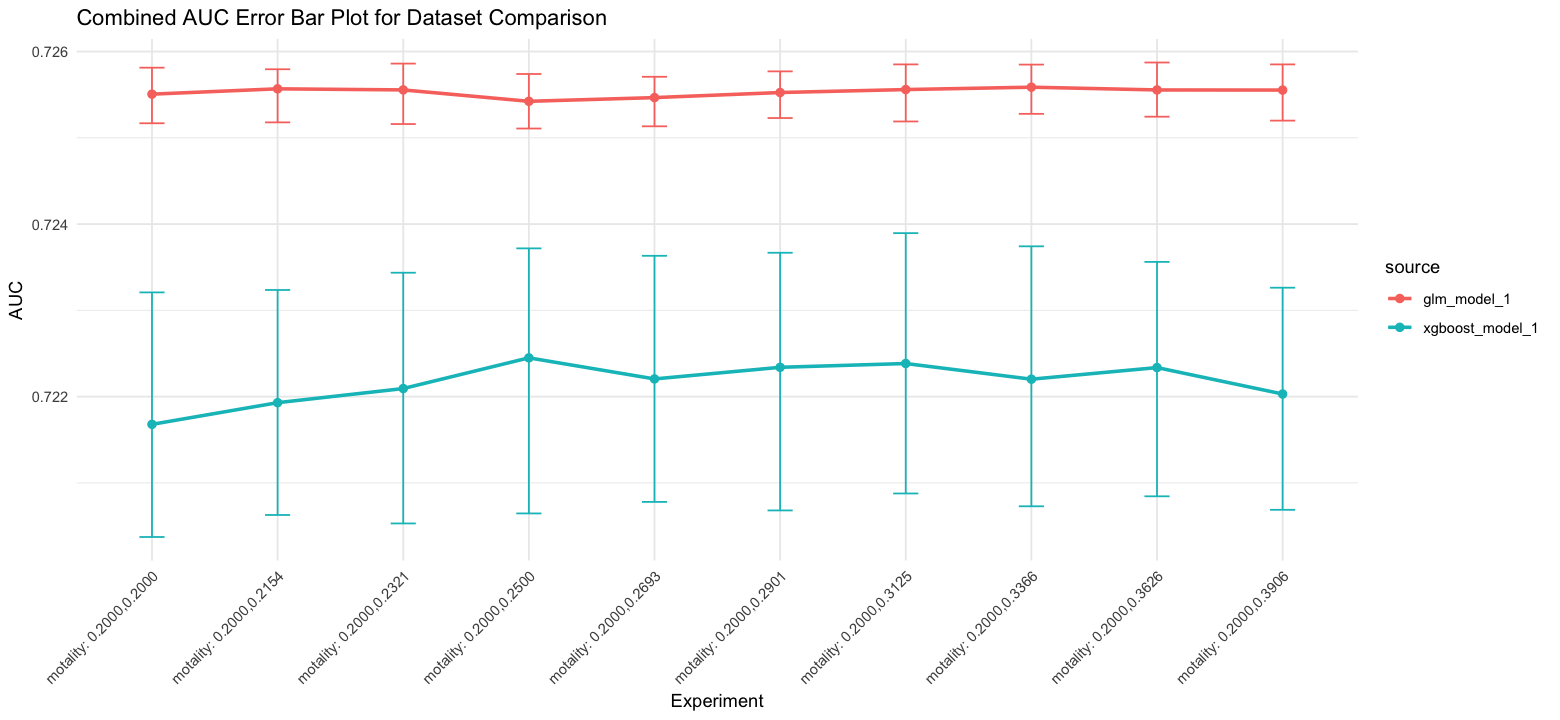

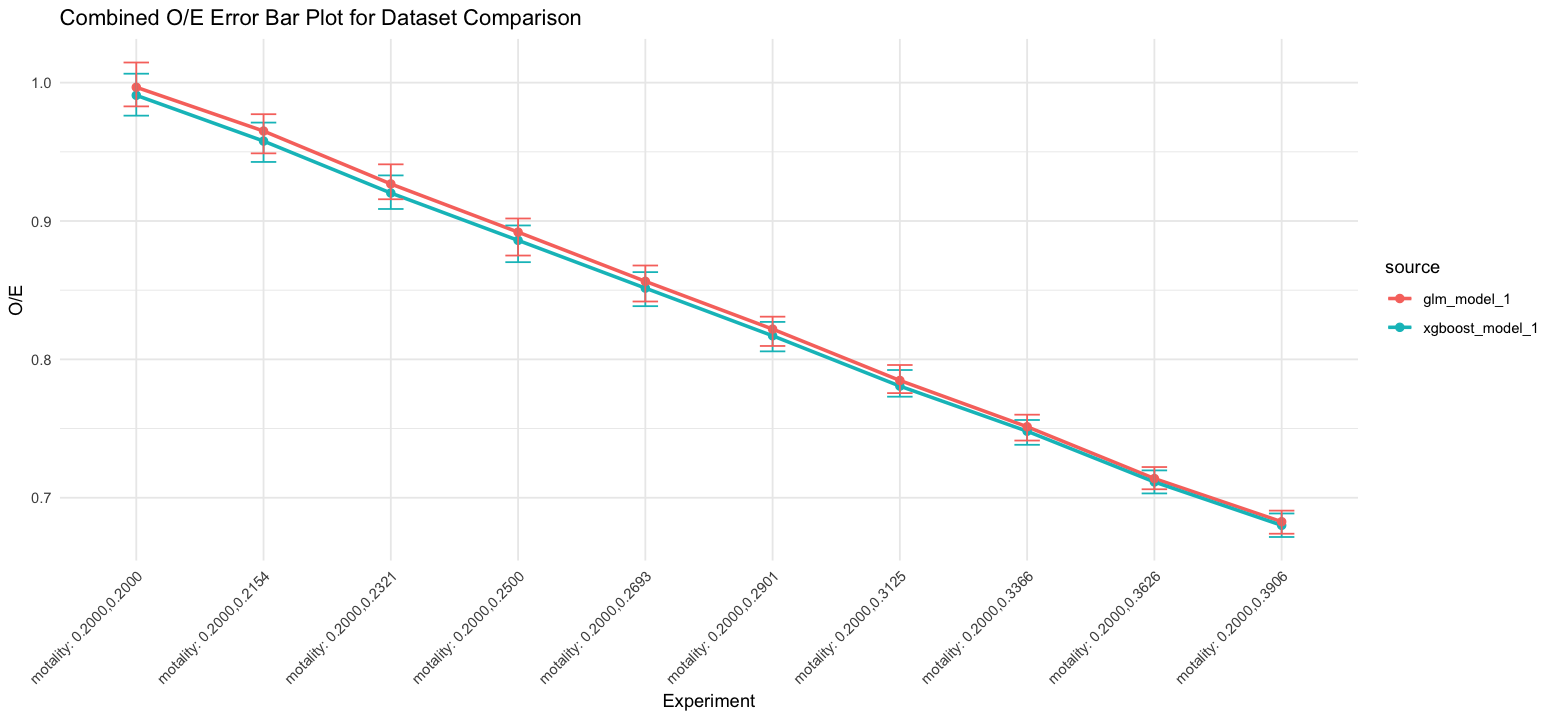

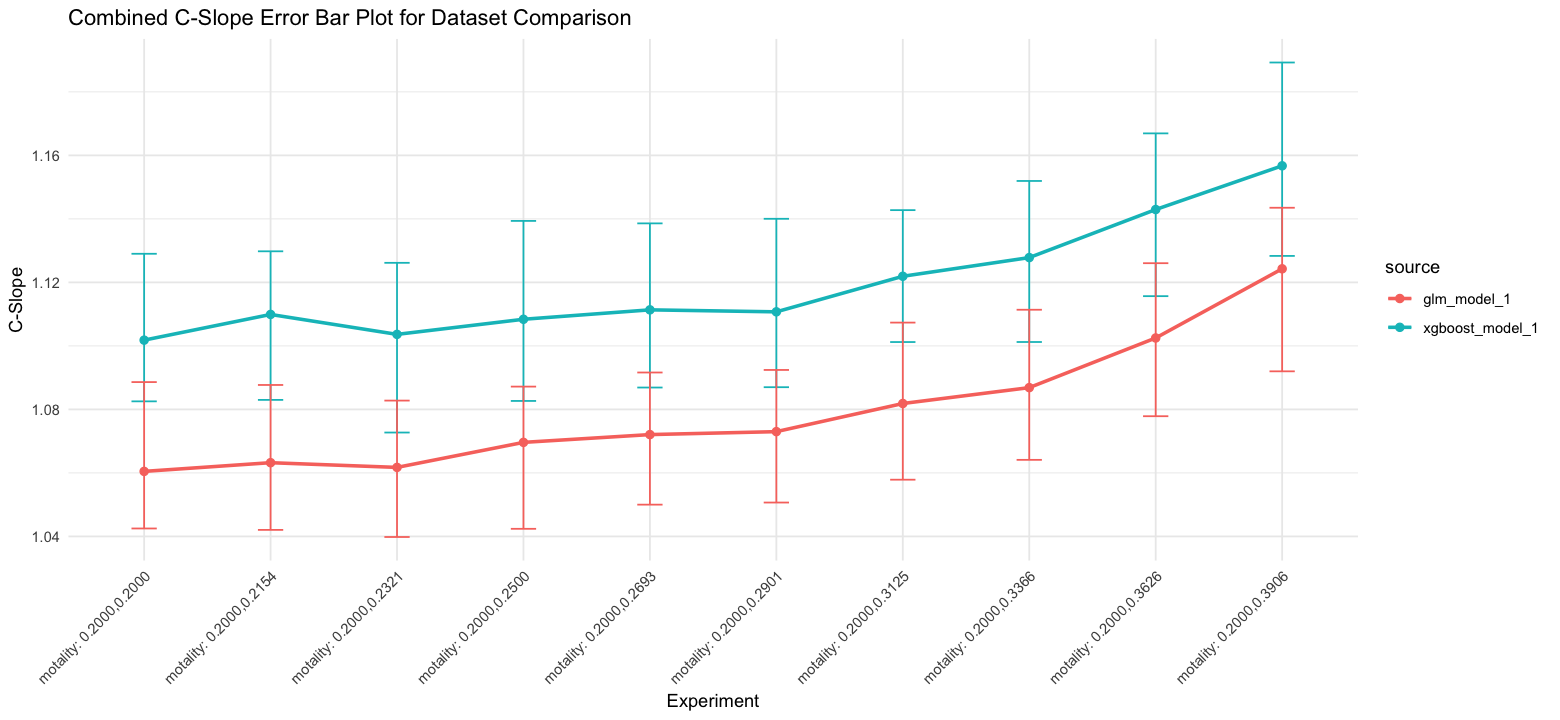

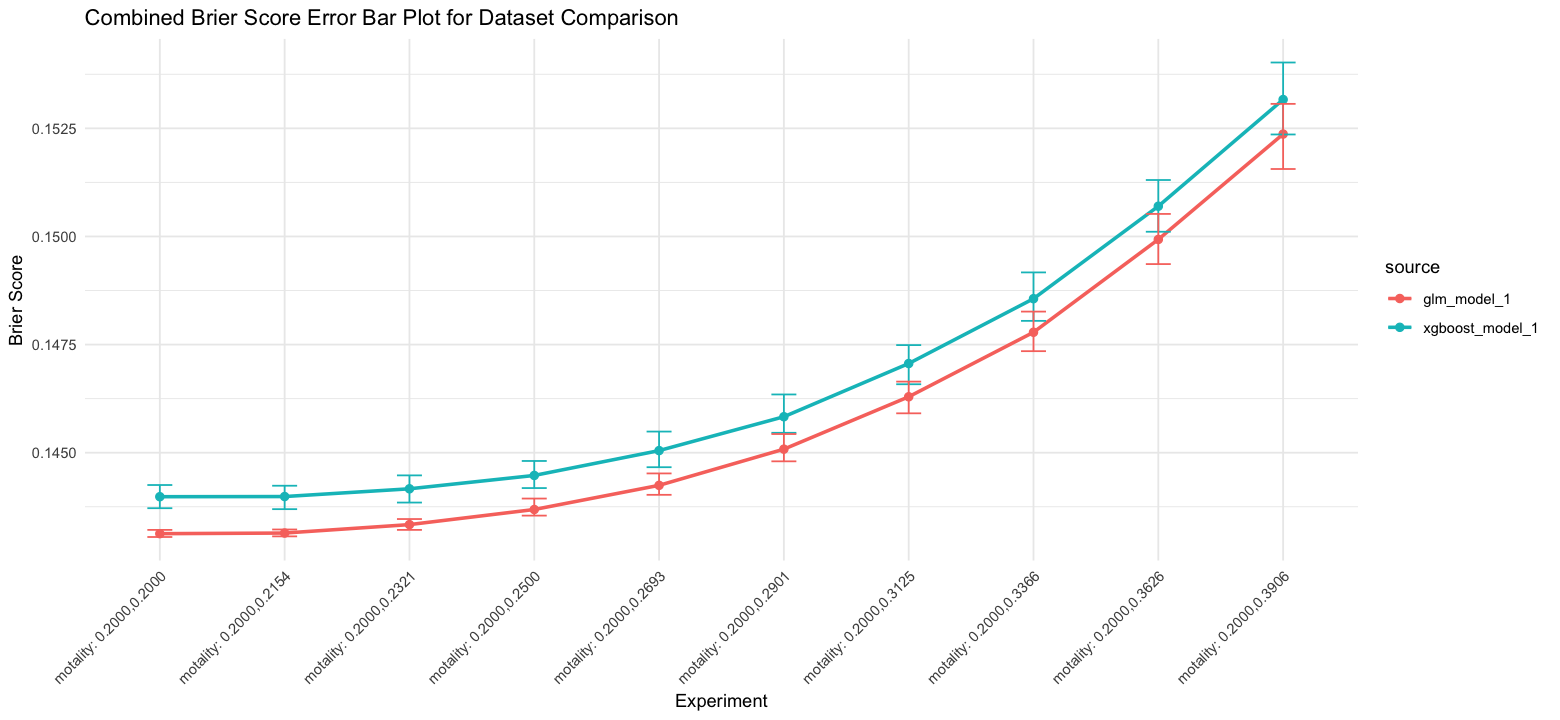

In [25]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(purrr) 

# 设置图像输出宽度
options(repr.plot.width = 13, repr.plot.height = 6)

# 定义第一个数据框
glm_model_1 <- data.frame(
  experiment = c("motality: 0.2000,0.2000", "motality: 0.2000,0.2154", "motality: 0.2000,0.2321", "motality: 0.2000,0.2500", "motality: 0.2000,0.2693", "motality: 0.2000,0.2901", "motality: 0.2000,0.3125", "motality: 0.2000,0.3366", "motality: 0.2000,0.3626", "motality: 0.2000,0.3906"),
  auc_median = c(0.7255060, 0.7255679, 0.7255552, 0.7254231, 0.7254661, 0.7255249, 0.7255593, 0.7255868, 0.7255548, 0.7255534),
  auc_25 = c(0.7251684, 0.7251789, 0.7251595, 0.7251075, 0.7251332, 0.7252292, 0.7251894, 0.7252777, 0.7252447, 0.7251992),
  auc_75 = c(0.7258128, 0.7257945, 0.7258601, 0.7257396, 0.7257073, 0.7257700, 0.7258508, 0.7258486, 0.7258728, 0.7258507),
  o_e_median = c(0.9966657, 0.9650215, 0.9267887, 0.8919628, 0.8563939, 0.8218748, 0.7847568, 0.7513184, 0.7138740, 0.6826636),
  o_e_25 = c(0.9828352, 0.9488913, 0.9157193, 0.8750409, 0.8418209, 0.8096841, 0.7756107, 0.7413308, 0.7061255, 0.6739923),
  o_e_75 = c(1.0145479, 0.9771854, 0.9409515, 0.9018108, 0.8678355, 0.8308580, 0.7959261, 0.7600237, 0.7221795, 0.6906828),
  c_slope_median = c(1.060477, 1.063220, 1.061734, 1.069615, 1.072067, 1.073000, 1.081856, 1.086860, 1.102494, 1.124277),
  c_slope_25 = c(1.042498, 1.042053, 1.039815, 1.042393, 1.050003, 1.050668, 1.057862, 1.064109, 1.077853, 1.091990),
  c_slope_75 = c(1.088602, 1.087693, 1.082774, 1.087179, 1.091619, 1.092423, 1.107336, 1.111385, 1.126043, 1.143504),
  brier_score_median = c(0.1431278, 0.1431420, 0.1433376, 0.1436865, 0.1442453, 0.1450821, 0.1462930, 0.1477848, 0.1499311, 0.1523678),
  brier_score_25 = c(0.1430508, 0.1430653, 0.1432151, 0.1435454, 0.1440259, 0.1448005, 0.1459105, 0.1473476, 0.1493612, 0.1515597),
  brier_score_75 = c(0.1432152, 0.1432245, 0.1434660, 0.1439397, 0.1445207, 0.1454317, 0.1466438, 0.1482628, 0.1505209, 0.1530659)
)

# 继续定义第二个数据框
xgboost_model_1 <- data.frame(
  experiment = c("motality: 0.2000,0.2000", "motality: 0.2000,0.2154", "motality: 0.2000,0.2321", "motality: 0.2000,0.2500", "motality: 0.2000,0.2693", "motality: 0.2000,0.2901", "motality: 0.2000,0.3125", "motality: 0.2000,0.3366", "motality: 0.2000,0.3626", "motality: 0.2000,0.3906"),
  auc_median = c(0.7216787, 0.7219298, 0.7220936, 0.7224495, 0.7222050, 0.7223398, 0.7223838, 0.7222019, 0.7223367, 0.7220302),
  auc_25 = c(0.7203728, 0.7206280, 0.7205298, 0.7206460, 0.7207796, 0.7206808, 0.7208773, 0.7207288, 0.7208445, 0.7206879),
  auc_75 = c(0.7232080, 0.7232361, 0.7234361, 0.7237183, 0.7236322, 0.7236675, 0.7238950, 0.7237421, 0.7235616, 0.7232625),
  o_e_median = c(0.9908482, 0.9577733, 0.9202353, 0.8860232, 0.8515045, 0.8170574, 0.7806801, 0.7480804, 0.7113970, 0.6800722),
  o_e_25 = c(0.9761388, 0.9426779, 0.9086843, 0.8702513, 0.8384490, 0.8057864, 0.7730285, 0.7382613, 0.7031168, 0.6716254),
  o_e_75 = c(1.0064552, 0.9711292, 0.9329508, 0.8967796, 0.8630508, 0.8270710, 0.7923073, 0.7561889, 0.7197500, 0.6886218),
  c_slope_median = c(1.101810, 1.109905, 1.103628, 1.108385, 1.111351, 1.110726, 1.121923, 1.127812, 1.142948, 1.156715),
  c_slope_25 = c(1.082535, 1.082994, 1.072714, 1.082662, 1.086887, 1.086990, 1.101212, 1.101225, 1.115663, 1.128335),
  c_slope_75 = c(1.129009, 1.129787, 1.126160, 1.139358, 1.138582, 1.140028, 1.142755, 1.151941, 1.166925, 1.189246),
  brier_score_median = c(0.1439825, 0.1439861, 0.1441653, 0.1444740, 0.1450488, 0.1458317, 0.1470621, 0.1485612, 0.1506991, 0.1531658),
  brier_score_25 = c(0.1437168, 0.1436945, 0.1438472, 0.1441823, 0.1446644, 0.1454603, 0.1465828, 0.1480483, 0.1501090, 0.1523582),
  brier_score_75 = c(0.1442527, 0.1442363, 0.1444755, 0.1448087, 0.1454887, 0.1463466, 0.1474880, 0.1491687, 0.1513052, 0.1540222)
)

# 合并两个数据集并添加标识列
combined_data_2 <- bind_rows(
  mutate(xgboost_model_1, source = "xgboost_model_1"),
  mutate(glm_model_1, source = "glm_model_1")
)

# 确保 experiment 列作为因子并按唯一值排序
combined_data_2$experiment <- factor(combined_data_2$experiment, levels = unique(combined_data_2$experiment))

# 创建合并后的图的函数
create_combined_plot_2 <- function(combined_df, metric_median, metric_25, metric_75, metric_name, y_label) {
  ggplot(combined_df, aes(x = experiment, y = !!sym(metric_median), color = source)) +
    geom_line(aes(group = source), size = 1) +
    geom_point(size = 2) +
    geom_errorbar(aes(ymin = !!sym(metric_25), ymax = !!sym(metric_75)), width = 0.2) +
    theme_minimal() +
    labs(title = paste("Combined", metric_name, "Error Bar Plot for Dataset Comparison"),
         x = "Experiment", y = y_label) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))
}

# 创建各个性能指标的图表
combined_auc_plot_2 <- create_combined_plot_2(combined_data_2, "auc_median", "auc_25", "auc_75", "AUC", "AUC")
combined_oe_plot_2 <- create_combined_plot_2(combined_data_2, "o_e_median", "o_e_25", "o_e_75", "O/E", "O/E")
combined_cslope_plot_2 <- create_combined_plot_2(combined_data_2, "c_slope_median", "c_slope_25", "c_slope_75", "C-Slope", "C-Slope")
combined_brier_score_plot_2 <- create_combined_plot_2(combined_data_2, "brier_score_median", "brier_score_25", "brier_score_75", "Brier Score", "Brier Score")

# 打印合并后的图表
print(combined_auc_plot_2)
print(combined_oe_plot_2)
print(combined_cslope_plot_2)
print(combined_brier_score_plot_2)

In [22]:
glm_model_1

experiment,auc_median,auc_25,auc_75,o_e_median,o_e_25,o_e_75,c_slope_median,c_slope_25,c_slope_75,brier_score_median,brier_score_25,brier_score_75
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"motality: 0.2000,0.2000",0.7255060,0.7251684,0.7258128,0.9966657,0.9828352,1.0145479,1.060477,1.042498,1.088602,0.1431278,0.1430508,0.1432152
"motality: 0.2000,0.2154",0.7255679,0.7251789,0.7257945,0.9650215,0.9488913,0.9771854,1.063220,1.042053,1.087693,0.1431420,0.1430653,0.1432245
"motality: 0.2000,0.2321",0.7255552,0.7251595,0.7258601,0.9267887,0.9157193,0.9409515,1.061734,1.039815,1.082774,0.1433376,0.1432151,0.1434660
"motality: 0.2000,0.2500",0.7254231,0.7251075,0.7257396,0.8919628,0.8750409,0.9018108,1.069615,1.042393,1.087179,0.1436865,0.1435454,0.1439397
"motality: 0.2000,0.2693",0.7254661,0.7251332,0.7257073,0.8563939,0.8418209,0.8678355,1.072067,1.050003,1.091619,0.1442453,0.1440259,0.1445207
"motality: 0.2000,0.2901",0.7255249,0.7252292,0.7257700,0.8218748,0.8096841,0.8308580,1.073000,1.050668,1.092423,0.1450821,0.1448005,0.1454317
"motality: 0.2000,0.3125",0.7255593,0.7251894,0.7258508,0.7847568,0.7756107,0.7959261,1.081856,1.057862,1.107336,0.1462930,0.1459105,0.1466438
"motality: 0.2000,0.3366",0.7255868,0.7252777,0.7258486,0.7513184,0.7413308,0.7600237,1.086860,1.064109,1.111385,0.1477848,0.1473476,0.1482628
"motality: 0.2000,0.3626",0.7255548,0.7252447,0.7258728,0.7138740,0.7061255,0.7221795,1.102494,1.077853,1.126043,0.1499311,0.1493612,0.1505209


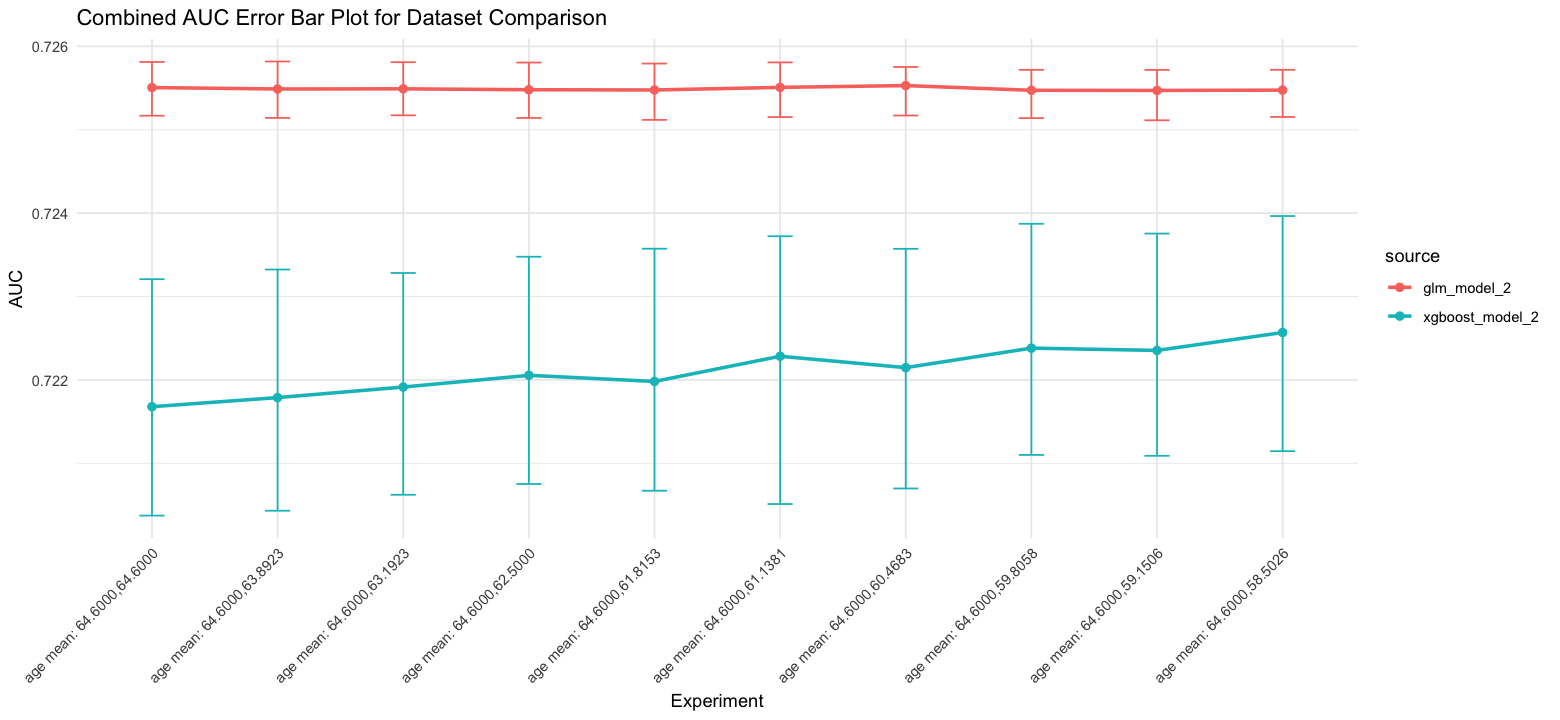

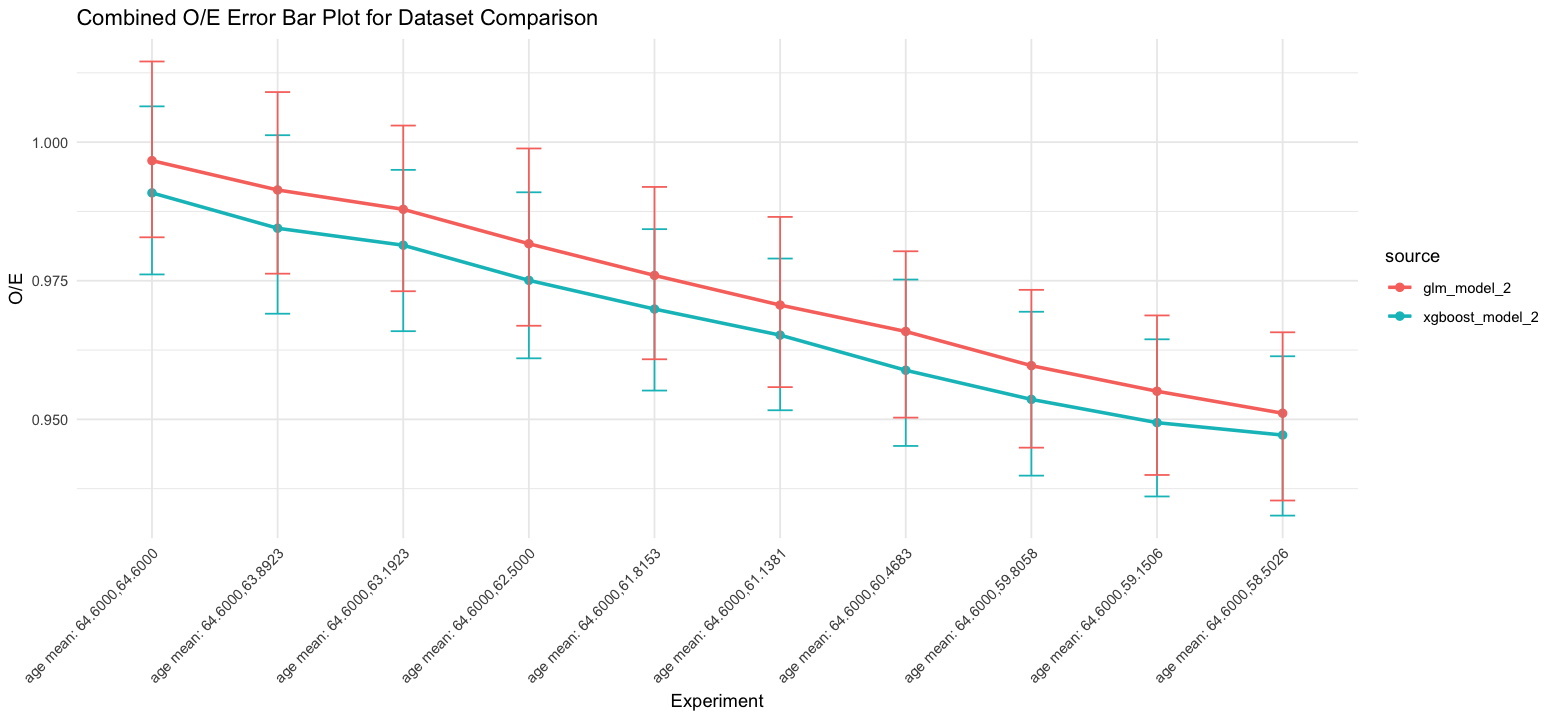

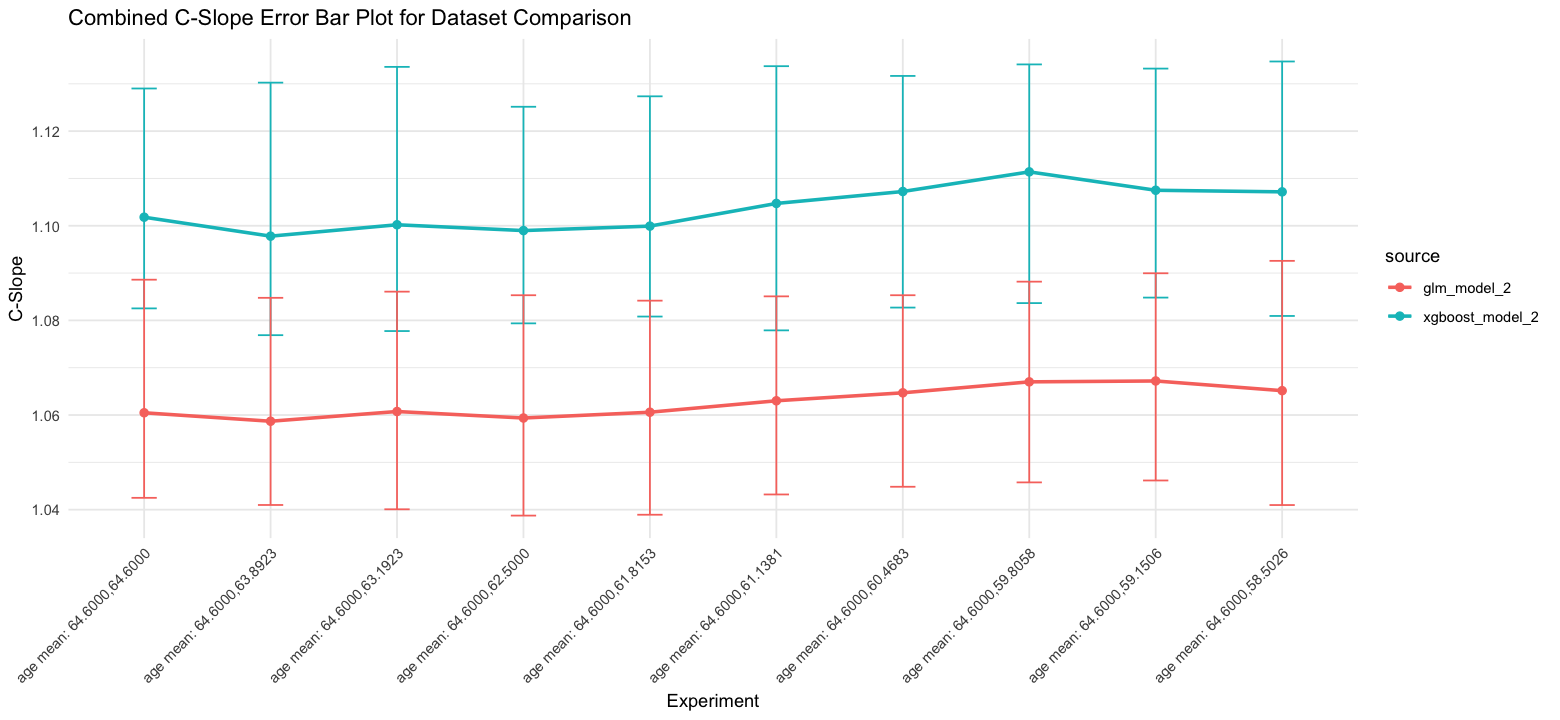

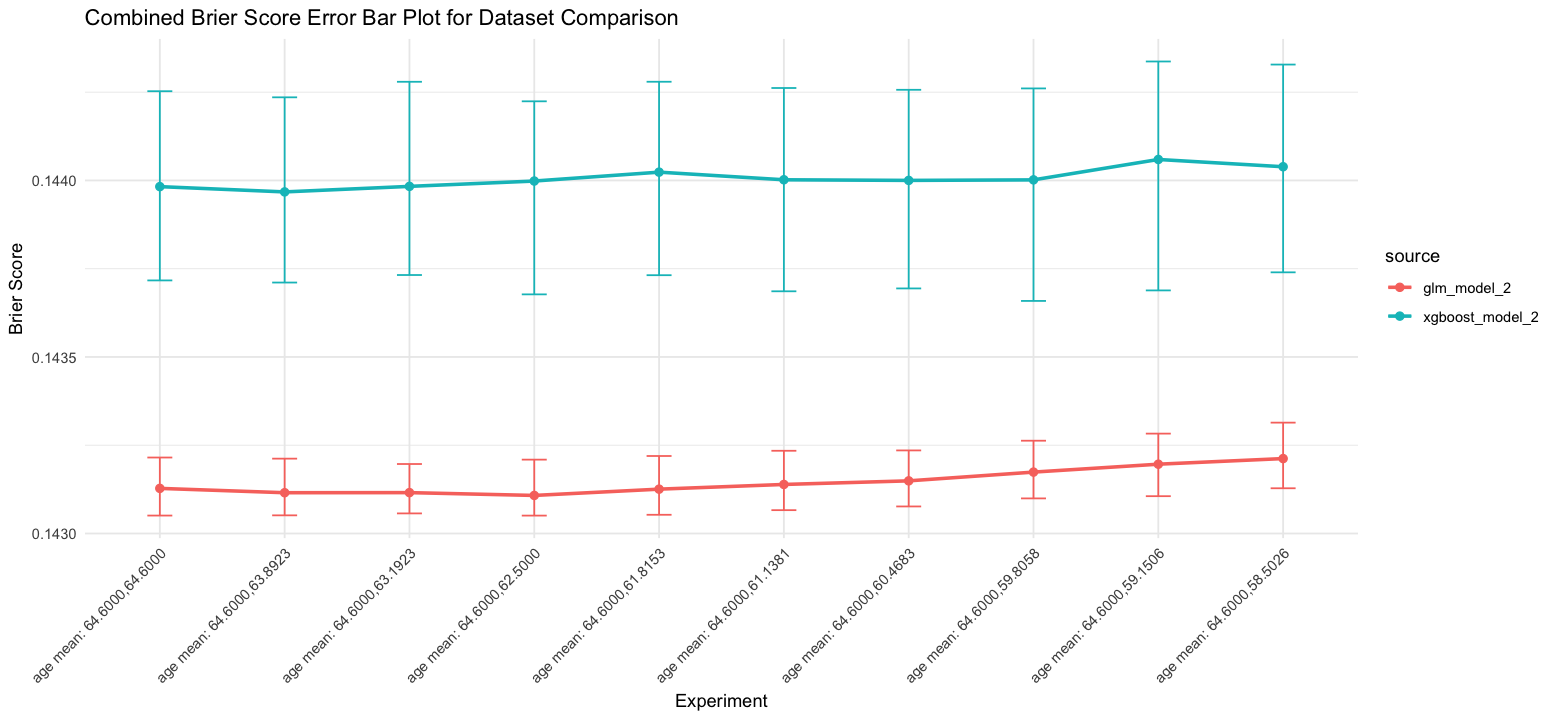

In [28]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(purrr) 

# 设置图像输出宽度
options(repr.plot.width = 13, repr.plot.height = 6)

glm_model_2 <- data.frame(
  experiment = c("age mean: 64.6000,64.6000", "age mean: 64.6000,63.8923", "age mean: 64.6000,63.1923", "age mean: 64.6000,62.5000", "age mean: 64.6000,61.8153", "age mean: 64.6000,61.1381", "age mean: 64.6000,60.4683", "age mean: 64.6000,59.8058", "age mean: 64.6000,59.1506", "age mean: 64.6000,58.5026"),
  auc_median = c(0.7255060, 0.7254888, 0.7254909, 0.7254799, 0.7254768, 0.7255081, 0.7255297, 0.7254730, 0.7254713, 0.7254751),
  auc_25 = c(0.7251684, 0.7251421, 0.7251729, 0.7251417, 0.7251184, 0.7251521, 0.7251708, 0.7251395, 0.7251134, 0.7251531),
  auc_75 = c(0.7258128, 0.7258185, 0.7258099, 0.7258056, 0.7257938, 0.7258073, 0.7257522, 0.7257183, 0.7257174, 0.7257186),
  o_e_median = c(0.9966657, 0.9913762, 0.9878837, 0.9816753, 0.9759669, 0.9706134, 0.9658539, 0.9596873, 0.9550690, 0.9511022),
  o_e_25 = c(0.9828352, 0.9762745, 0.9731066, 0.9668818, 0.9608355, 0.9558116, 0.9503112, 0.9448924, 0.9399665, 0.9353604),
  o_e_75 = c(1.0145479, 1.0090320, 1.0029924, 0.9988567, 0.9919204, 0.9865125, 0.9803155, 0.9733582, 0.9687421, 0.9657010),
  c_slope_median = c(1.060477, 1.058687, 1.060744, 1.059369, 1.060595, 1.063010, 1.064694, 1.067011, 1.067200, 1.065149),
  c_slope_25 = c(1.042498, 1.040988, 1.040076, 1.038745, 1.038927, 1.043210, 1.044839, 1.045762, 1.046166, 1.040975),
  c_slope_75 = c(1.088602, 1.084769, 1.086074, 1.085316, 1.084171, 1.085078, 1.085317, 1.088186, 1.089957, 1.092581),
  brier_score_median = c(0.1431278, 0.1431155, 0.1431158, 0.1431078, 0.1431256, 0.1431389, 0.1431491, 0.1431739, 0.1431963, 0.1432122),
  brier_score_25 = c(0.1430508, 0.1430514, 0.1430569, 0.1430507, 0.1430530, 0.1430661, 0.1430766, 0.1430994, 0.1431057, 0.1431281),
  brier_score_75 = c(0.1432152, 0.1432120, 0.1431968, 0.1432092, 0.1432195, 0.1432343, 0.1432353, 0.1432628, 0.1432829, 0.1433140)
)


# 继续定义第二个数据框
xgboost_model_2 <- data.frame(
  experiment = c(
    "age mean: 64.6000,64.6000", "age mean: 64.6000,63.8923", "age mean: 64.6000,63.1923", 
    "age mean: 64.6000,62.5000", "age mean: 64.6000,61.8153", "age mean: 64.6000,61.1381", 
    "age mean: 64.6000,60.4683", "age mean: 64.6000,59.8058", "age mean: 64.6000,59.1506", 
    "age mean: 64.6000,58.5026"
  ),
  auc_median = c(
    0.7216787, 0.7217880, 0.7219143, 0.7220551, 0.7219815, 0.7222837, 
    0.7221471, 0.7223812, 0.7223537, 0.7225682
  ),
  auc_25 = c(
    0.7203728, 0.7204313, 0.7206225, 0.7207519, 0.7206711, 0.7205115, 
    0.7206978, 0.7211003, 0.7210897, 0.7211453
  ),
  auc_75 = c(
    0.7232080, 0.7233237, 0.7232823, 0.7234771, 0.7235735, 0.7237230, 
    0.7235719, 0.7238721, 0.7237548, 0.7239650
  ),
  o_e_median = c(
    0.9908482, 0.9844732, 0.9814085, 0.9750750, 0.9698941, 0.9651909, 
    0.9588548, 0.9535999, 0.9494069, 0.9471640
  ),
  o_e_25 = c(
    0.9761388, 0.9690526, 0.9659025, 0.9610075, 0.9551928, 0.9516392, 
    0.9452016, 0.9398469, 0.9360897, 0.9326391
  ),
  o_e_75 = c(
    1.0064552, 1.0012505, 0.9950010, 0.9909535, 0.9843047, 0.9790055, 
    0.9752148, 0.9694069, 0.9644379, 0.9613778
  ),
  c_slope_median = c(
    1.101810, 1.097802, 1.100211, 1.098982, 1.099926, 1.104716, 
    1.107238, 1.111393, 1.107503, 1.107167
  ),
  c_slope_25 = c(
    1.082535, 1.076876, 1.077746, 1.079372, 1.080812, 1.077892, 
    1.082709, 1.083655, 1.084818, 1.080936
  ),
  c_slope_75 = c(
    1.129009, 1.130247, 1.133578, 1.125148, 1.127355, 1.133725, 
    1.131664, 1.134098, 1.133216, 1.134717
  ),
  brier_score_median = c(
    0.1439825, 0.1439675, 0.1439832, 0.1439983, 0.1440235, 0.1440019, 
    0.1440001, 0.1440016, 0.1440594, 0.1440388
  ),
  brier_score_25 = c(
    0.1437168, 0.1437108, 0.1437321, 0.1436773, 0.1437316, 0.1436860, 
    0.1436941, 0.1436587, 0.1436885, 0.1437397
  ),
  brier_score_75 = c(
    0.1442527, 0.1442354, 0.1442794, 0.1442241, 0.1442795, 0.1442618, 
    0.1442567, 0.1442606, 0.1443369, 0.1443282
  )
)
# 合并两个数据集并添加标识列
combined_data_2 <- bind_rows(
  mutate(xgboost_model_2, source = "xgboost_model_2"),
  mutate(glm_model_2, source = "glm_model_2")
)

# 确保 experiment 列作为因子并按唯一值排序
combined_data_2$experiment <- factor(combined_data_2$experiment, levels = unique(combined_data_2$experiment))

# 创建合并后的图的函数
create_combined_plot_2 <- function(combined_df, metric_median, metric_25, metric_75, metric_name, y_label) {
  ggplot(combined_df, aes(x = experiment, y = !!sym(metric_median), color = source)) +
    geom_line(aes(group = source), size = 1) +
    geom_point(size = 2) +
    geom_errorbar(aes(ymin = !!sym(metric_25), ymax = !!sym(metric_75)), width = 0.2) +
    theme_minimal() +
    labs(title = paste("Combined", metric_name, "Error Bar Plot for Dataset Comparison"),
         x = "Experiment", y = y_label) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))
}

# 创建各个性能指标的图表
combined_auc_plot_2 <- create_combined_plot_2(combined_data_2, "auc_median", "auc_25", "auc_75", "AUC", "AUC")
combined_oe_plot_2 <- create_combined_plot_2(combined_data_2, "o_e_median", "o_e_25", "o_e_75", "O/E", "O/E")
combined_cslope_plot_2 <- create_combined_plot_2(combined_data_2, "c_slope_median", "c_slope_25", "c_slope_75", "C-Slope", "C-Slope")
combined_brier_score_plot_2 <- create_combined_plot_2(combined_data_2, "brier_score_median", "brier_score_25", "brier_score_75", "Brier Score", "Brier Score")

# 打印合并后的图表
print(combined_auc_plot_2)
print(combined_oe_plot_2)
print(combined_cslope_plot_2)
print(combined_brier_score_plot_2)